In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacepy
import os
from uncertainties import ufloat, unumpy
import datetime as dt
import copy
import seaborn as sns
import geopandas as gpd

%load_ext autoreload
%autoreload 2

import spectra_running_tools as SRT

import sketch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
def save_figure_for_paper(file_name:str):

    #path_to_paper_folder = "../../../../windowsHomeDir/University of Surrey/HEPI - General/HEPI/WP5000/HEPI background paper files/"
    path_to_paper_folder = "../../../../../windowsDesktop/HEPI background paper files/"

    plt.savefig(path_to_paper_folder + file_name + ".png", bbox_inches="tight",dpi=500)
    plt.savefig(path_to_paper_folder + file_name + ".eps", bbox_inches="tight",dpi=500)

In [144]:
def fill_between_errorbar(x_vals,y_vals,y_err,**kwargs):

    plt.plot(x_vals,
            y_vals,
            marker="o",
            ms=3,
            **kwargs)
    plt.fill_between(x_vals,
                np.array(y_vals) - np.array(y_err),
                np.array(y_vals) + np.array(y_err),
                color=plt.gca().lines[-1].get_color(),
                alpha=0.4)

In [145]:
spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)
spacecraft_coords_DF.columns = ['ModifiedJulianDay',
'Altitude_km',
'Latitude_deg',
'Longitude_deg',
'LocalTime_hrs',
'PitchAngle_deg']
spacecraft_coords_DF

/tmp/ipykernel_94341/1845830959.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)


ModifiedJulianDay  Altitude_km  Latitude_deg  Longitude_deg  \
0          18628.000000     1192.835      0.000000     354.938757   
1          18628.000694     1192.891      3.313331     354.688073   
2          18628.001389     1193.060      6.626412     354.437390   
3          18628.002083     1193.338      9.939000     354.186707   
4          18628.002778     1193.722     13.250860     353.936025   
...                 ...          ...           ...            ...   
1088       18628.755556     1193.970    -13.371240      82.192904   
1089       18628.756250     1193.583    -10.059640      81.942378   
1090       18628.756944     1193.301     -6.747288      81.691850   
1091       18628.757639     1193.129     -3.434439      81.441319   
1092       18628.758333     1193.068     -0.121333      81.190789   

      LocalTime_hrs  PitchAngle_deg  
0         23.662584            90.0  
1         23.662538            90.0  
2         23.662493            90.0  
3         23.662447            90.0  
4         23.662402            90.0  
...             ...             ...  
1088      23.612860            90.0  
1089      23.612825            90.0  
1090      23.612790            90.0  
1091      23.612755            90.0  
1092      23.612719            90.0  

[1093 rows x 6 columns]

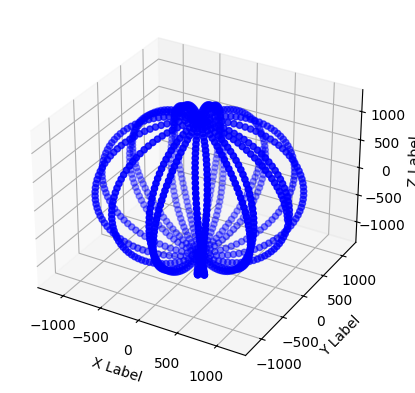

In [146]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# get the data from the dataframe
index = spacecraft_coords_DF.index
ModifiedJulianDay = spacecraft_coords_DF['ModifiedJulianDay']
Altitude_km = spacecraft_coords_DF['Altitude_km']
Latitude_deg = spacecraft_coords_DF['Latitude_deg']
Longitude_deg = spacecraft_coords_DF['Longitude_deg']
LocalTime_hrs = spacecraft_coords_DF['LocalTime_hrs']
PitchAngle_deg = spacecraft_coords_DF['PitchAngle_deg']

# convert coordinates to Cartesian 
x = Altitude_km * np.cos(np.radians(Latitude_deg)) * np.cos(np.radians(Longitude_deg)) 
y = Altitude_km * np.cos(np.radians(Latitude_deg)) * np.sin(np.radians(Longitude_deg)) 
z = Altitude_km * np.sin(np.radians(Latitude_deg)) 

# plot the trajectory in 3D 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x, y, z, c='b', marker='o') 
ax.set_xlabel('X Label') 
ax.set_ylabel('Y Label') 
ax.set_zlabel('Z Label') 
plt.show() 

In [147]:
IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)
IRENE8_450_electrons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.04,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    1,
    1.25,
    1.5,
    1.75,
    2,
    2.25,
    2.5,
    2.75,
    3,
    3.25,
    3.5,
    3.75,
    4,
    4.25,
    4.5,
    4.75,
    5,
    5.5,
    6,
    6.5,
    7
]
IRENE8_450_electrons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_electrons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_electrons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_electrons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

IRENE8_450_electrons

/tmp/ipykernel_94341/3684036918.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)


Latitude_deg  Longitude_deg       0.04        0.1       0.2       0.3  \
0         0.000000     354.938757  1537300.0  1209300.0  750380.0  339930.0   
1         3.313331     354.688073   729880.0   574970.0  363090.0  168080.0   
2         6.626412     354.437390   387980.0   307940.0  198260.0   94564.0   
3         9.939000     354.186707   287760.0   228280.0  146830.0   69917.0   
4        13.250860     353.936025   201860.0   159250.0   98662.0   45200.0   
...            ...            ...        ...        ...       ...       ...   
1088    -13.371240      82.192904        0.0        0.0       0.0       0.0   
1089    -10.059640      81.942378        0.0        0.0       0.0       0.0   
1090     -6.747288      81.691850        0.0        0.0       0.0       0.0   
1091     -3.434439      81.441319        0.0        0.0       0.0       0.0   
1092     -0.121333      81.190789        0.0        0.0       0.0       0.0   

           0.4      0.5      0.6      0.7  ...    3.75    4  4.25  4.5  4.75  \
0     112420.0  37182.0  19539.0  10268.0  ...  1.6375  0.0   0.0  0.0   0.0   
1      57040.0  19357.0  10406.0   5594.3  ...  1.5384  0.0   0.0  0.0   0.0   
2      33416.0  11808.0   6514.8   3594.5  ...  1.9403  0.0   0.0  0.0   0.0   
3      24649.0   8689.6   4788.0   2638.2  ...  1.4023  0.0   0.0  0.0   0.0   
4      15312.0   5187.2   2785.8   1496.1  ...  0.0000  0.0   0.0  0.0   0.0   
...        ...      ...      ...      ...  ...     ...  ...   ...  ...   ...   
1088       0.0      0.0      0.0      0.0  ...  0.0000  0.0   0.0  0.0   0.0   
1089       0.0      0.0      0.0      0.0  ...  0.0000  0.0   0.0  0.0   0.0   
1090       0.0      0.0      0.0      0.0  ...  0.0000  0.0   0.0  0.0   0.0   
1091       0.0      0.0      0.0      0.0  ...  0.0000  0.0   0.0  0.0   0.0   
1092       0.0      0.0      0.0      0.0  ...  0.0000  0.0   0.0  0.0   0.0   

        5  5.5    6  6.5    7  
0     0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  
1088  0.0  0.0  0.0  0.0  0.0  
1089  0.0  0.0  0.0  0.0  0.0  
1090  0.0  0.0  0.0  0.0  0.0  
1091  0.0  0.0  0.0  0.0  0.0  
1092  0.0  0.0  0.0  0.0  0.0  

[1093 rows x 32 columns]

In [148]:
IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)
IRENE8_450_protons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.1, 
    0.15, 
    0.2, 
    0.3, 
    0.4, 
    0.5, 
    0.6, 
    0.7, 
    1, 
    1.5, 
    2, 
    3, 
    4, 
    5, 
    6, 
    7, 
    10, 
    15, 
    20, 
    30, 
    40, 
    50, 
    60, 
    70, 
    100, 
    150, 
    200, 
    300, 
    400
]
IRENE8_450_protons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_protons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_protons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_protons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

IRENE8_450_protons

/tmp/ipykernel_94341/382106000.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)


Latitude_deg  Longitude_deg     0.1    0.15     0.2     0.3     0.4  \
0         0.000000     354.938757  3519.5  3504.1  3488.7  3475.4  3462.1   
1         3.313331     354.688073  3141.3  3132.8  3124.2  3116.3  3108.4   
2         6.626412     354.437390  2742.0  2735.6  2729.2  2722.8  2716.5   
3         9.939000     354.186707  2032.5  2024.1  2015.7  2007.3  1999.0   
4        13.250860     353.936025  1320.5  1316.1  1311.8  1307.1  1302.4   
...            ...            ...     ...     ...     ...     ...     ...   
1088    -13.371240      82.192904     0.0     0.0     0.0     0.0     0.0   
1089    -10.059640      81.942378     0.0     0.0     0.0     0.0     0.0   
1090     -6.747288      81.691850     0.0     0.0     0.0     0.0     0.0   
1091     -3.434439      81.441319     0.0     0.0     0.0     0.0     0.0   
1092     -0.121333      81.190789     0.0     0.0     0.0     0.0     0.0   

         0.5     0.6     0.7  ...      30       40       50       60       70  \
0     3454.2  3446.3  3433.0  ...  2518.5  2347.60  2188.30  2031.70  1895.40   
1     3103.5  3098.7  3090.8  ...  2391.8  2236.00  2090.30  1951.90  1828.90   
2     2713.4  2710.2  2703.9  ...  2159.3  2025.00  1899.10  1778.70  1671.70   
3     1996.7  1994.3  1985.9  ...  1613.9  1523.00  1437.10  1345.80  1268.50   
4     1297.0  1291.6  1283.5  ...  1050.0   991.75   936.75   881.96   831.92   
...      ...     ...     ...  ...     ...      ...      ...      ...      ...   
1088     0.0     0.0     0.0  ...     0.0     0.00     0.00     0.00     0.00   
1089     0.0     0.0     0.0  ...     0.0     0.00     0.00     0.00     0.00   
1090     0.0     0.0     0.0  ...     0.0     0.00     0.00     0.00     0.00   
1091     0.0     0.0     0.0  ...     0.0     0.00     0.00     0.00     0.00   
1092     0.0     0.0     0.0  ...     0.0     0.00     0.00     0.00     0.00   

          100      150     200     300      400  
0     1531.80  1041.00  707.42  306.64  132.920  
1     1496.40  1042.50  726.23  326.90  147.150  
2     1378.60   971.83  685.09  312.98  142.980  
3     1051.80   740.84  521.84  233.21  104.220  
4      691.92   480.22  333.29  140.57   59.285  
...       ...      ...     ...     ...      ...  
1088     0.00     0.00    0.00    0.00    0.000  
1089     0.00     0.00    0.00    0.00    0.000  
1090     0.00     0.00    0.00    0.00    0.000  
1091     0.00     0.00    0.00    0.00    0.000  
1092     0.00     0.00    0.00    0.00    0.000  

[1093 rows x 31 columns]

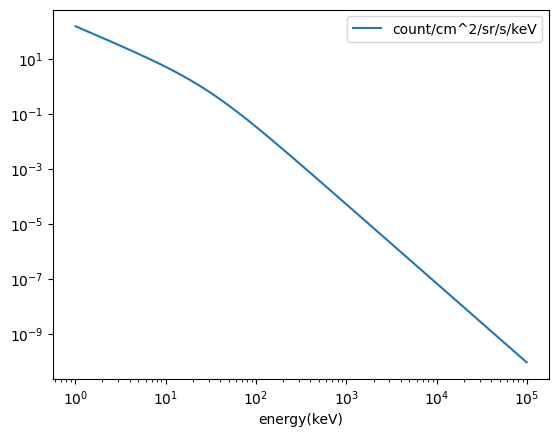

In [149]:
pd.read_csv("cxb_moretti_new.dat",delimiter=" ").plot("energy(keV)","count/cm^2/sr/s/keV")
plt.yscale("log")
plt.xscale("log")

In [150]:
cxb_moretti_DF = pd.read_csv("cxb_moretti_new.dat",delimiter=" ")
cxb_moretti_DF["energy(MeV)"] = cxb_moretti_DF["energy(keV)"] / 1000
cxb_moretti_DF["count/cm^2/s/MeV"] = cxb_moretti_DF["count/cm^2/sr/s/keV"] * 1000 * np.pi / 2 #need to divide by 2, because the CXB will be obscured by Earth
cxb_moretti_DF_formatted_differential = cxb_moretti_DF[["energy(MeV)","count/cm^2/s/MeV"]].transpose()
cxb_moretti_DF_formatted_differential.columns = cxb_moretti_DF_formatted_differential.iloc[0]
cxb_moretti_DF_formatted_differential.drop("energy(MeV)",inplace=True)
cxb_moretti_DF_formatted_differential.reset_index(drop=True,inplace=True)
#cxb_moretti_DF_formatted_differential = pd.concat([pd.DataFrame({"Latitude_deg":[0.0],"Longitude_deg":[0.0]}),cxb_moretti_DF_formatted_differential],axis=1)
cxb_moretti_DF_formatted_differential = pd.concat([IRENE8_450_protons[["Latitude_deg","Longitude_deg"]],cxb_moretti_DF_formatted_differential],axis=1)
cxb_moretti_DF_formatted_differential.fillna(method="ffill",inplace=True)
cxb_moretti_DF_formatted_differential

/tmp/ipykernel_94341/2298338294.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cxb_moretti_DF_formatted_differential.fillna(method="ffill",inplace=True)


Latitude_deg  Longitude_deg       0.001012       0.001023  \
0         0.000000     354.938757  234472.062637  230691.933278   
1         3.313331     354.688073  234472.062637  230691.933278   
2         6.626412     354.437390  234472.062637  230691.933278   
3         9.939000     354.186707  234472.062637  230691.933278   
4        13.250860     353.936025  234472.062637  230691.933278   
...            ...            ...            ...            ...   
1088    -13.371240      82.192904  234472.062637  230691.933278   
1089    -10.059640      81.942378  234472.062637  230691.933278   
1090     -6.747288      81.691850  234472.062637  230691.933278   
1091     -3.434439      81.441319  234472.062637  230691.933278   
1092     -0.121333      81.190789  234472.062637  230691.933278   

           0.001035       0.001047       0.001059      0.001072  \
0     226972.285291  223312.150787  219710.577367  216166.62788   
1     226972.285291  223312.150787  219710.577367  216166.62788   
2     226972.285291  223312.150787  219710.577367  216166.62788   
3     226972.285291  223312.150787  219710.577367  216166.62788   
4     226972.285291  223312.150787  219710.577367  216166.62788   
...             ...            ...            ...           ...   
1088  226972.285291  223312.150787  219710.577367  216166.62788   
1089  226972.285291  223312.150787  219710.577367  216166.62788   
1090  226972.285291  223312.150787  219710.577367  216166.62788   
1091  226972.285291  223312.150787  219710.577367  216166.62788   
1092  226972.285291  223312.150787  219710.577367  216166.62788   

           0.001084       0.001097  ...     89.114823     90.147763  \
0     212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
1     212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
2     212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
3     212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
4     212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
...             ...            ...  ...           ...           ...   
1088  212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
1089  212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
1090  212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
1091  212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   
1092  212679.380173  209247.926858  ...  1.943585e-07  1.880136e-07   

         91.192676     92.249701     93.318977     94.400648     95.494856  \
0     1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
1     1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
2     1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
3     1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
4     1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
...            ...           ...           ...           ...           ...   
1088  1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
1089  1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
1090  1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
1091  1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   
1092  1.818758e-07  1.759384e-07  1.701948e-07  1.646386e-07  1.592639e-07   

         96.601748      97.72147      98.85417  
0     1.540647e-07  1.490351e-07  1.441698e-07  
1     1.540647e-07  1.490351e-07  1.441698e-07  
2     1.540647e-07  1.490351e-07  1.441698e-07  
3     1.540647e-07  1.490351e-07  1.441698e-07  
4     1.540647e-07  1.490351e-07  1.441698e-07  
...            ...           ...           ...  
1088  1.540647e-07  1.490351e-07  1.441698e-07  
1089  1.540647e-07  1.490351e-07  1.441698e-07  
1090  1.540647e-07  1.490351e-07  1.441698e-07  
1091  1.540647e-07  1.490351e-07  1.441698e-07  
1092  1.540647e-07  1.490351e-07  1.441698e-07  

[1093 rows x 1000

In [151]:
def get_albedo_gamma_flux(energy_in_MeV:float):
    
    # model taken from https://www.academia.edu/58345520/A_compact_instrument_for_gamma_ray_burst_detection_on_a_CubeSat_platform_I?email_work_card=thumbnail

    C = 0.0080

    energy_in_keV = energy_in_MeV * 1000.0

    if energy_in_MeV < 1:
        output_flux = C/(((energy_in_keV / 44.0)**(-5)) + (energy_in_keV / 44.0)**(1.4))
    elif (1 <= energy_in_MeV) and (energy_in_MeV < 20):
        output_flux = 1.01e-4 * ((energy_in_keV/1000.0)**(-1.34))
    else:
        output_flux = 7.29e-4 * ((energy_in_keV/1000.0)**(-2.0))

    output_flux_corrected_units = output_flux * 1000 * np.pi # converting to units of count/cm^2/s/MeV

    return output_flux_corrected_units

    

/tmp/ipykernel_94341/2426720445.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  albedo_gamma_DF_formatted_differential.fillna(method="ffill",inplace=True)


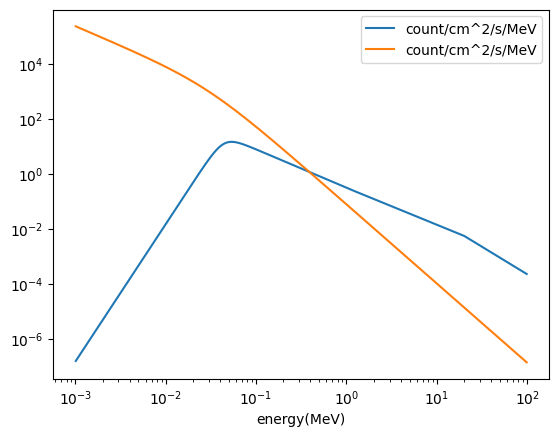

In [152]:
albedo_gamma_DF = pd.DataFrame()
albedo_gamma_DF["energy(MeV)"] = cxb_moretti_DF["energy(MeV)"].copy()
albedo_gamma_DF["count/cm^2/s/MeV"] = albedo_gamma_DF["energy(MeV)"].apply(get_albedo_gamma_flux)


albedo_gamma_DF_formatted_differential = albedo_gamma_DF[["energy(MeV)","count/cm^2/s/MeV"]].transpose()
albedo_gamma_DF_formatted_differential.columns = albedo_gamma_DF_formatted_differential.iloc[0]
albedo_gamma_DF_formatted_differential.drop("energy(MeV)",inplace=True)
albedo_gamma_DF_formatted_differential.reset_index(drop=True,inplace=True)
#albedo_gamma_DF_formatted_differential = pd.concat([pd.DataFrame({"Latitude_deg":[0.0],"Longitude_deg":[0.0]}),albedo_gamma_DF_formatted_differential],axis=1)
albedo_gamma_DF_formatted_differential = pd.concat([IRENE8_450_protons[["Latitude_deg","Longitude_deg"]],albedo_gamma_DF_formatted_differential],axis=1)
albedo_gamma_DF_formatted_differential.fillna(method="ffill",inplace=True)
albedo_gamma_DF_formatted_differential


albedo_gamma_DF.plot("energy(MeV)","count/cm^2/s/MeV")
cxb_moretti_DF.plot("energy(MeV)","count/cm^2/s/MeV",ax=plt.gca())

plt.xscale("log")
plt.yscale("log")

In [153]:
def convert_integral_values_to_differential(integral_DF):

    differential_DF_coords = integral_DF.iloc[:,:2]

    differential_DF_energy_vals = (integral_DF.iloc[:,2:-1].columns +integral_DF.iloc[:,3:].columns)/2
    differential_DF_values = -1 * integral_DF.iloc[:,2:].diff(axis=1).iloc[:,1:] / np.diff(integral_DF.iloc[:,2:].columns)
    differential_DF_values.columns = differential_DF_energy_vals

    return pd.concat([differential_DF_coords,differential_DF_values],axis=1)

In [154]:
IRENE8_450_electrons_differential = convert_integral_values_to_differential(IRENE8_450_electrons)
IRENE8_450_protons_differential = convert_integral_values_to_differential(IRENE8_450_protons)

In [155]:
IRENE8_450_electrons_differential_shortened = IRENE8_450_electrons_differential.drop(columns=IRENE8_450_electrons_differential.columns[2:11])

In [156]:
IRENE8_450_electrons_differential_shortened

Latitude_deg  Longitude_deg    1.125    1.375    1.625   1.875    2.125  \
0         0.000000     354.938757   5039.2  2607.72   922.28  618.24   504.52   
1         3.313331     354.688073  2716.08  1416.32   498.24  337.44   286.28   
2         6.626412     354.437390   1774.0   945.88   337.76  232.16  201.908   
3         9.939000     354.186707  1300.24   692.28   246.88  169.56  147.344   
4        13.250860     353.936025   725.48   378.56  133.744   90.44   76.012   
...            ...            ...      ...      ...      ...     ...      ...   
1088    -13.371240      82.192904     -0.0     -0.0     -0.0    -0.0     -0.0   
1089    -10.059640      81.942378     -0.0     -0.0     -0.0    -0.0     -0.0   
1090     -6.747288      81.691850     -0.0     -0.0     -0.0    -0.0     -0.0   
1091     -3.434439      81.441319     -0.0     -0.0     -0.0    -0.0     -0.0   
1092     -0.121333      81.190789     -0.0     -0.0     -0.0    -0.0     -0.0   

       2.375    2.625    2.875  ...    3.625   3.875 4.125 4.375 4.625 4.875  \
0     302.04   199.78  111.164  ...  18.7532    6.55  -0.0  -0.0  -0.0  -0.0   
1     170.52  113.232   62.176  ...  11.3468  6.1536  -0.0  -0.0  -0.0  -0.0   
2     122.04   82.488   45.996  ...   7.4096  7.7612  -0.0  -0.0  -0.0  -0.0   
3     88.964   60.068   33.452  ...   5.3692  5.6092  -0.0  -0.0  -0.0  -0.0   
4     45.424  30.2536  16.6852  ...   4.7284    -0.0  -0.0  -0.0  -0.0  -0.0   
...      ...      ...      ...  ...      ...     ...   ...   ...   ...   ...   
1088    -0.0     -0.0     -0.0  ...     -0.0    -0.0  -0.0  -0.0  -0.0  -0.0   
1089    -0.0     -0.0     -0.0  ...     -0.0    -0.0  -0.0  -0.0  -0.0  -0.0   
1090    -0.0     -0.0     -0.0  ...     -0.0    -0.0  -0.0  -0.0  -0.0  -0.0   
1091    -0.0     -0.0     -0.0  ...     -0.0    -0.0  -0.0  -0.0  -0.0  -0.0   
1092    -0.0     -0.0     -0.0  ...     -0.0    -0.0  -0.0  -0.0  -0.0  -0.0   

     5.25 5.75 6.25 6.75  
0    -0.0 -0.0 -0.0 -0.0  
1    -0.0 -0.0 -0.0 -0.0  
2    -0.0 -0.0 -0.0 -0.0  
3    -0.0 -0.0 -0.0 -0.0  
4    -0.0 -0.0 -0.0 -0.0  
...   ...  ...  ...  ...  
1088 -0.0 -0.0 -0.0 -0.0  
1089 -0.0 -0.0 -0.0 -0.0  
1090 -0.0 -0.0 -0.0 -0.0  
1091 -0.0 -0.0 -0.0 -0.0  
1092 -0.0 -0.0 -0.0 -0.0  

[1093 rows x 22 columns]

In [157]:
IRENE8_450_electrons_differential_shortened.iloc[843]["Latitude_deg"]

np.float64(-79.1385)

In [158]:
IRENE8_450_protons_differential

Latitude_deg  Longitude_deg  0.125  0.175   0.25   0.35  0.45  0.55  \
0         0.000000     354.938757  308.0  308.0  133.0  133.0  79.0  79.0   
1         3.313331     354.688073  170.0  172.0   79.0   79.0  49.0  48.0   
2         6.626412     354.437390  128.0  128.0   64.0   63.0  31.0  32.0   
3         9.939000     354.186707  168.0  168.0   84.0   83.0  23.0  24.0   
4        13.250860     353.936025   88.0   86.0   47.0   47.0  54.0  54.0   
...            ...            ...    ...    ...    ...    ...   ...   ...   
1088    -13.371240      82.192904   -0.0   -0.0   -0.0   -0.0  -0.0  -0.0   
1089    -10.059640      81.942378   -0.0   -0.0   -0.0   -0.0  -0.0  -0.0   
1090     -6.747288      81.691850   -0.0   -0.0   -0.0   -0.0  -0.0  -0.0   
1091     -3.434439      81.441319   -0.0   -0.0   -0.0   -0.0  -0.0  -0.0   
1092     -0.121333      81.190789   -0.0   -0.0   -0.0   -0.0  -0.0  -0.0   

       0.65       0.85  ...   25.0   35.0   45.0   55.0   65.0       85.0  \
0     133.0      101.0  ...  26.54  17.09  15.93  15.66  13.63      12.12   
1      79.0  74.666667  ...  21.68  15.58  14.57  13.84   12.3  11.083333   
2      63.0  61.333333  ...  18.34  13.43  12.59  12.04   10.7       9.77   
3      84.0  57.333333  ...  14.36   9.09   8.59   9.13   7.73   7.223333   
4      81.0  72.666667  ...   7.95  5.825    5.5  5.479  5.004   4.666667   
...     ...        ...  ...    ...    ...    ...    ...    ...        ...   
1088   -0.0       -0.0  ...   -0.0   -0.0   -0.0   -0.0   -0.0       -0.0   
1089   -0.0       -0.0  ...   -0.0   -0.0   -0.0   -0.0   -0.0       -0.0   
1090   -0.0       -0.0  ...   -0.0   -0.0   -0.0   -0.0   -0.0       -0.0   
1091   -0.0       -0.0  ...   -0.0   -0.0   -0.0   -0.0   -0.0       -0.0   
1092   -0.0       -0.0  ...   -0.0   -0.0   -0.0   -0.0   -0.0       -0.0   

       125.0   175.0   250.0    350.0  
0      9.816  6.6716  4.0078   1.7372  
1      9.078  6.3254  3.9933   1.7975  
2     8.1354  5.7348  3.7211      1.7  
3     6.2192    4.38  2.8863   1.2899  
4      4.234  2.9386  1.9272  0.81285  
...      ...     ...     ...      ...  
1088    -0.0    -0.0    -0.0     -0.0  
1089    -0.0    -0.0    -0.0     -0.0  
1090    -0.0    -0.0    -0.0     -0.0  
1091    -0.0    -0.0    -0.0     -0.0  
1092    -0.0    -0.0    -0.0     -0.0  

[1093 rows x 30 columns]

In [159]:
def get_photon_inducing_event_count_per_second(output_run, threshold_photon_value=10.0):
    try:
        return output_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=threshold_photon_value)
    except AttributeError:
        return output_run

In [160]:
index_for_horns_max = 839
index_for_SAA_max = 826
index_for_polar = 847

In [161]:
SRT.default_shielding_geometry

In [162]:
class orbital_run():

    def __init__(self, 
                 DF_of_coordinates_and_spectra:pd.DataFrame, 
                 particle_species:str, 
                 shielding_geometry=SRT.default_shielding_geometry,
                 label=None,
                 label_for_run=None,
                 threshold_photon_value=10.0,
                 number_of_particles_to_simulate=100_000):
        
        self.run_dict = {}

        self.label = label

        self.DF_of_coordinates_and_spectra = DF_of_coordinates_and_spectra

        for index, spectrum_row in DF_of_coordinates_and_spectra.iterrows():

            self.run_dict[index] = self.run_Cherenkov_simulation_across_row(particle_species, shielding_geometry, label_for_run, number_of_particles_to_simulate, spectrum_row)

        self.run_dict_event_counts = pd.Series(self.run_dict).apply(lambda x:get_photon_inducing_event_count_per_second(x,
                                                                                                                        threshold_photon_value=threshold_photon_value))

    def run_Cherenkov_simulation_across_row(self, particle_species, shielding_geometry, label_for_run, number_of_particles_to_simulate, spectrum_row):
        
        file_path_to_use = f"file_path_for_spectrum_row.csv"

        spectrum_row[2:].to_csv(file_path_to_use,header=None,sep=" ")

        max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)

        if max_particles_per_s > 0.0:

            row_as_a_spectrum = SRT.particle_spectrum(particle_species=SRT.particle(particle_species),
                                                        spectrum_file_path=file_path_to_use,
                                                        incoming_particles_per_s_per_cm2=max_particles_per_s)
                                                        
            Cherenkov_run_for_row = SRT.wrapper_gras_Cherenkov_runner_from_objects(row_as_a_spectrum,
                                                shielding_geometry,
                                                #SRT.no_shielding_geometry,
                                                Cherenkov_run_label = label_for_run,
                                                number_of_particles=number_of_particles_to_simulate,
                                                );

        else:
            Cherenkov_run_for_row = ufloat(0.0,0.0)

        os.remove(file_path_to_use)
        return Cherenkov_run_for_row

    def plot_run_dict(self, xvalues_to_use = None, error_bar_function=plt.errorbar):

        if xvalues_to_use is None:
            xvalues_to_use = self.run_dict_event_counts.index
        elif isinstance(xvalues_to_use,str):
            if xvalues_to_use == "latitudes":
                xvalues_to_use = self.DF_of_coordinates_and_spectra["Latitude_deg"]

        error_bar_function(xvalues_to_use,
                self.run_dict_event_counts.apply(lambda x:x.n),
                self.run_dict_event_counts.apply(lambda x:x.std_dev),
                label=self.label)
        plt.yscale("log")
        plt.grid(True)
        plt.ylabel("cts / second")
        plt.xlabel("Latitude (degrees)")

    def __add__(self, right):

        output_orbital_run = copy.deepcopy(self)

        output_orbital_run.run_dict = {0:self.run_dict, 1:right.run_dict}

        output_orbital_run.run_dict_event_counts = self.run_dict_event_counts + right.run_dict_event_counts
        output_orbital_run.label = self.label + " plus " + right.label

        return output_orbital_run

    def print_count_rates_info(self):

        print(f"polar region count rate: {self.run_dict_event_counts[index_for_polar]} cts/s".replace("+/-","±"))
        print(f"horns region count rate: {self.run_dict_event_counts[index_for_horns_max]} cts/s".replace("+/-","±"))
        print(f"SAA region count rate: {self.run_dict_event_counts[index_for_SAA_max]} cts/s".replace("+/-","±"))

In [163]:
IRENE8_450_electrons_differential_shortened.iloc[790:850].sample(60,random_state=1).sort_index().iloc[40]

Latitude_deg      -36.36174
Longitude_deg    326.870838
1.125               38120.0
1.375               22614.8
1.625               12939.2
1.875                7863.6
2.125                4827.2
2.375                2914.4
2.625                2845.6
2.875               1022.16
3.125               370.108
3.375               131.064
3.625               46.4428
3.875                 16.43
4.125                8.9952
4.375                  -0.0
4.625                  -0.0
4.875                  -0.0
5.25                   -0.0
5.75                   -0.0
6.25                   -0.0
6.75                   -0.0
Name: 830, dtype: object

In [164]:
IRENE8_450_electrons_differential_shortened_single_orbit = IRENE8_450_electrons_differential_shortened.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, 
                                               particle_species="e-",
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0, 
                                               number_of_particles_to_simulate=1_000_000) #100_000)

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/home/xisacross/programming/HEPI/.venv/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, sp

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].valu

polar region count rate: 0.0±0 cts/s
horns region count rate: (1.30±0.07)e+03 cts/s
SAA region count rate: (2.3±0.4)e+02 cts/s


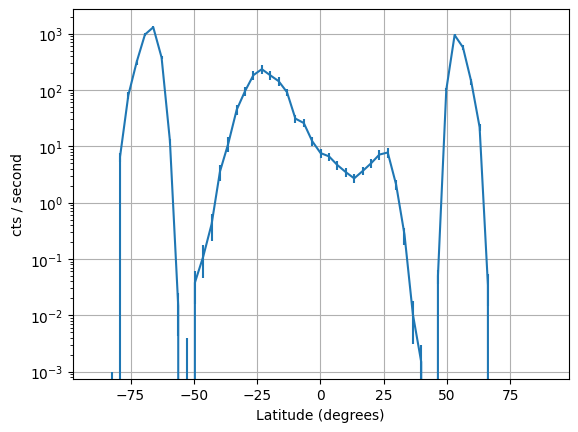

In [165]:
IRENE8_450_electrons_orbital_run.print_count_rates_info()

IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")

In [166]:
IRENE8_450_protons_differential_single_orbit = IRENE8_450_protons_differential.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_differential_single_orbit, particle_species="proton",
                                             number_of_particles_to_simulate=1_000_000,label="AP8 protons",threshold_photon_value=20.0)

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].valu

polar region count rate: 0.0±0 cts/s
horns region count rate: (0±7)e+01 cts/s
SAA region count rate: 114±10 cts/s


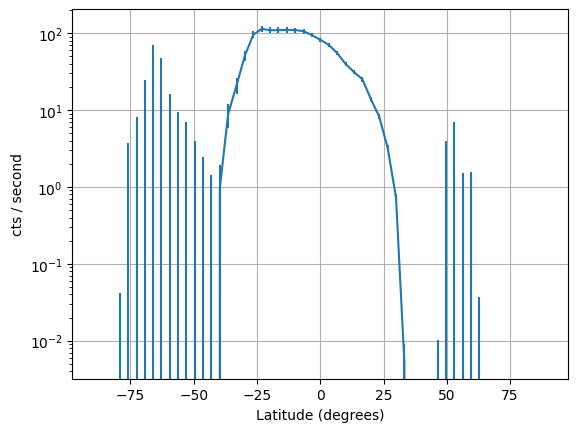

In [167]:
IRENE8_450_protons_orbital_run.print_count_rates_info()

IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")

In [168]:
CXB_photons_orbital_run = orbital_run(cxb_moretti_DF_formatted_differential.iloc[790:850].sample(60,random_state=1).sort_index(), particle_species="gamma",
                                             number_of_particles_to_simulate=10_000_000,label="CXB gammas",threshold_photon_value=20.0)

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].valu

polar region count rate: 0.013±0.005 cts/s
horns region count rate: 0.013±0.005 cts/s
SAA region count rate: 0.013±0.005 cts/s


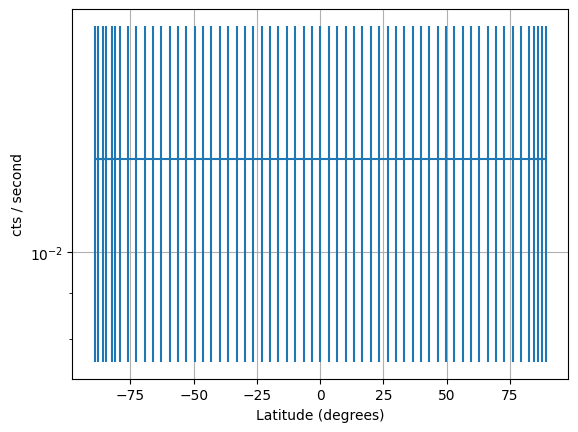

In [169]:
CXB_photons_orbital_run.print_count_rates_info()

CXB_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")

In [170]:
dir(CXB_photons_orbital_run.run_dict[790])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_Cherenkov_tuple',
 'directory_to_run_in',
 'generated_geometry',
 'generated_macro',
 'generation_surface_area_cm2',
 'generation_surface_radius',
 'get_total_photon_inducing_event_count_per_second',
 'incoming_particles_per_s',
 'initialise_dir_and_copy_geom_and_mac_files',
 'initialise_output_gras_directory',
 'initialise_running_directory_and_macro',
 'outputted_tuple',
 'plot_pulse_height_distribution',
 'run_gras_simulation',
 'setup_input_variables',
 'verbose_output']

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:233: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))
/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:213: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


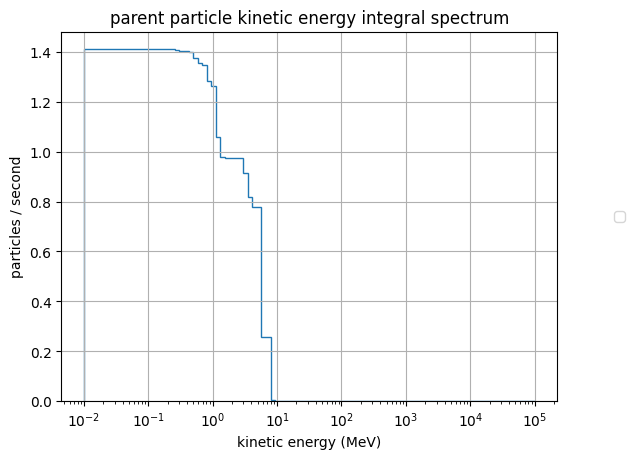

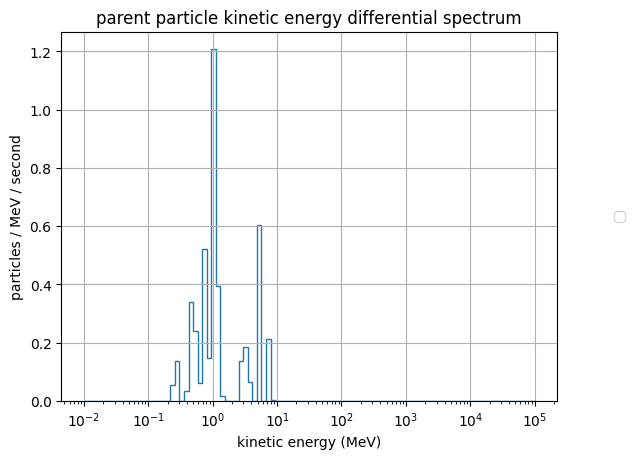

In [171]:
CXB_photons_orbital_run.run_dict[790].outputted_tuple.plot_integral_primary_spectra()
plt.figure()
CXB_photons_orbital_run.run_dict[790].outputted_tuple.plot_differential_primary_spectra()

In [172]:
albedo_photons_orbital_run = orbital_run(albedo_gamma_DF_formatted_differential.iloc[790:850].sample(60,random_state=1).sort_index(), particle_species="gamma",
                                             number_of_particles_to_simulate=100_000,label="albedo gammas",threshold_photon_value=20.0)

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].valu

polar region count rate: 0.380±0.023 cts/s
horns region count rate: 0.380±0.023 cts/s
SAA region count rate: 0.380±0.023 cts/s


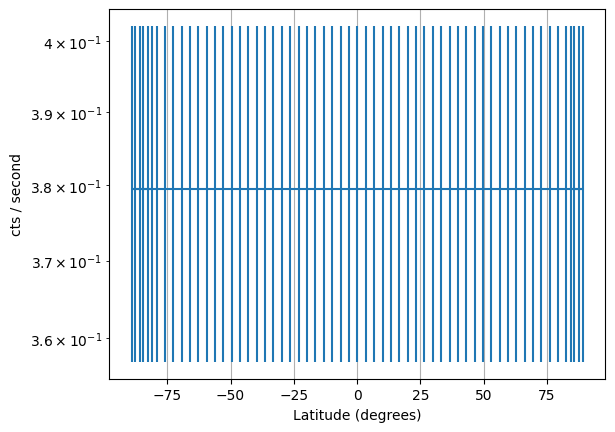

In [173]:
albedo_photons_orbital_run.print_count_rates_info()

albedo_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:233: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))
/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:213: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


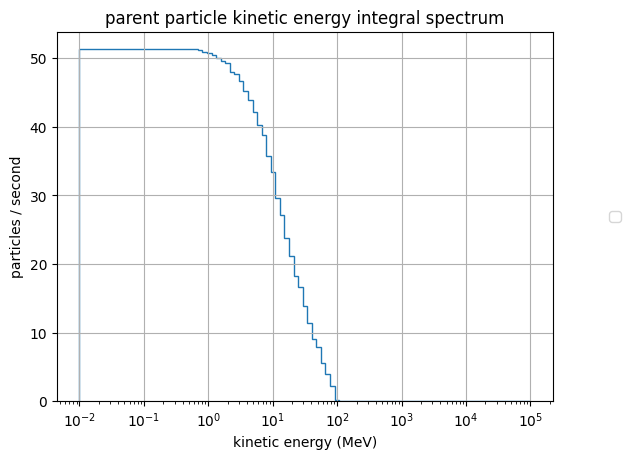

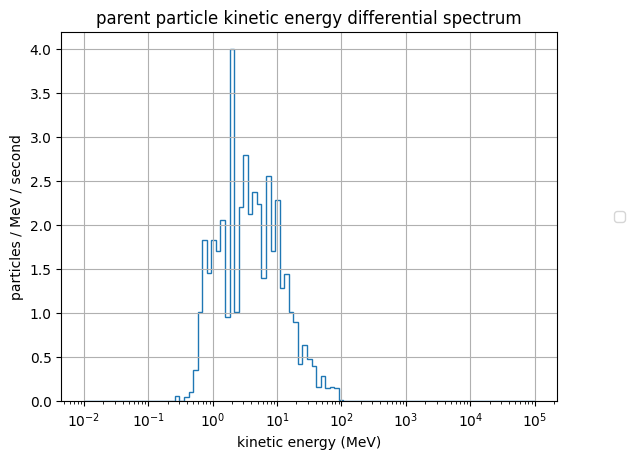

In [174]:
albedo_photons_orbital_run.run_dict[790].outputted_tuple.plot_integral_primary_spectra()
plt.figure()
albedo_photons_orbital_run.run_dict[790].outputted_tuple.plot_differential_primary_spectra()

In [175]:
index_for_horns_max

839

In [176]:
IRENE8_450_electrons_differential_shortened_single_orbit.columns[2:]

Index([1.125, 1.375, 1.625, 1.875, 2.125, 2.375, 2.625, 2.875, 3.125, 3.375,
       3.625, 3.875, 4.125, 4.375, 4.625, 4.875,  5.25,  5.75,  6.25,  6.75],
      dtype='object')

Text(0, 0.5, 'particles / second / cm2 / MeV')

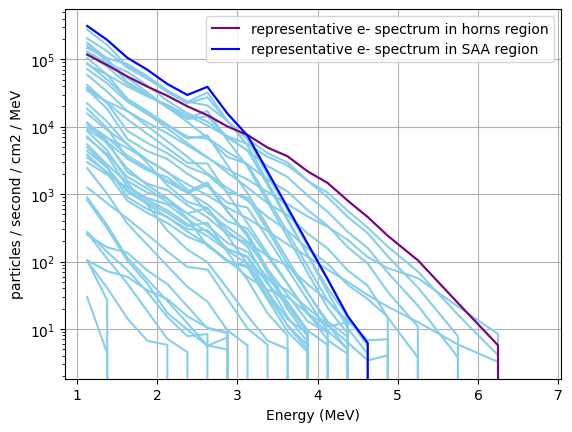

In [177]:
plt.plot(IRENE8_450_electrons_differential_shortened_single_orbit.columns[2:],
        np.transpose(IRENE8_450_electrons_differential_shortened_single_orbit.values[:,2:]),color="skyblue")
plt.plot(IRENE8_450_electrons_differential_shortened_single_orbit.columns[2:],
        np.transpose(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_horns_max].values[:,2:]),
        color="purple",label="representative e- spectrum in horns region")
plt.plot(IRENE8_450_electrons_differential_shortened_single_orbit.columns[2:],
        np.transpose(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max].values[:,2:]),
        color="blue",label="representative e- spectrum in SAA region")
plt.yscale("log")
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel(r"particles / second / cm2 / MeV")

Text(0, 0.5, 'particles / second / cm2')

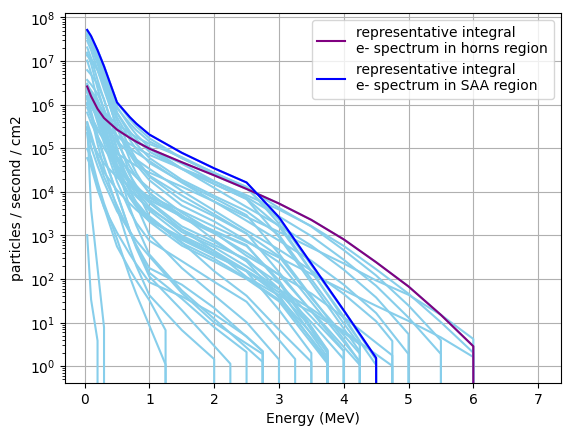

In [178]:


plt.plot(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().values[:,2:]),color="skyblue")
plt.plot(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index()[IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().index == index_for_horns_max].values[:,2:]),
        color="purple",label="representative integral\ne- spectrum in horns region")
plt.plot(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index()[IRENE8_450_electrons.iloc[790:850].sample(60,random_state=1).sort_index().index == index_for_SAA_max].values[:,2:]),
        color="blue",label="representative integral\ne- spectrum in SAA region")
plt.yscale("log")
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel(r"particles / second / cm2")

Text(0, 0.5, 'particles / second / cm2 / MeV')

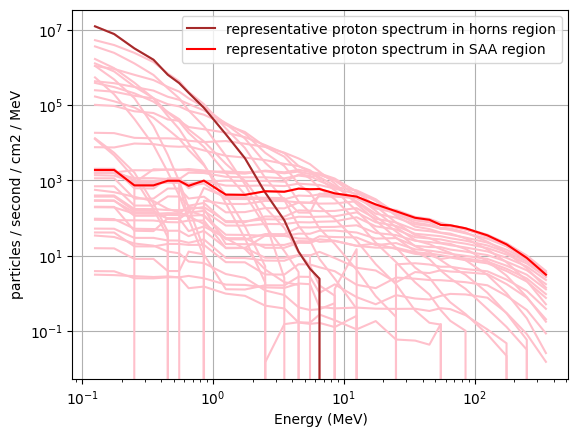

In [179]:
plt.plot(IRENE8_450_protons_differential_single_orbit.columns[2:],
        np.transpose(IRENE8_450_protons_differential_single_orbit.values[:,2:]),color="pink")
plt.plot(IRENE8_450_protons_differential_single_orbit.columns[2:],
        np.transpose(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_horns_max].values[:,2:]),
        color="brown",label="representative proton spectrum in horns region")
plt.plot(IRENE8_450_protons_differential_single_orbit.columns[2:],
        np.transpose(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max].values[:,2:]),
        color="red",label="representative proton spectrum in SAA region")
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel(r"particles / second / cm2 / MeV")

Text(0, 0.5, 'particles / second / cm2')

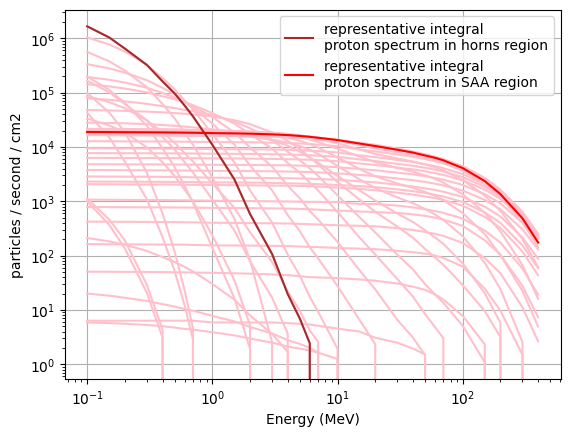

In [180]:
plt.plot(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().values[:,2:]),color="pink")
plt.plot(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index()[IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().index == index_for_horns_max].values[:,2:]),
        color="brown",label="representative integral\nproton spectrum in horns region")
plt.plot(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().columns[2:],
        np.transpose(IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index()[IRENE8_450_protons.iloc[790:850].sample(60,random_state=1).sort_index().index == index_for_SAA_max].values[:,2:]),
        color="red",label="representative integral\nproton spectrum in SAA region")
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel(r"particles / second / cm2")

In [181]:
IRENE8_450_electrons_orbital_run.print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: (1.30±0.07)e+03 cts/s
SAA region count rate: (2.3±0.4)e+02 cts/s


In [182]:
IRENE8_450_protons_orbital_run.print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: (0±7)e+01 cts/s
SAA region count rate: 114±10 cts/s


In [183]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: (1.30±0.10)e+03 cts/s
SAA region count rate: (3.5±0.5)e+02 cts/s


/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/home/xisacross/programming/HEPI/.venv/lib/python3.12/site-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, sp

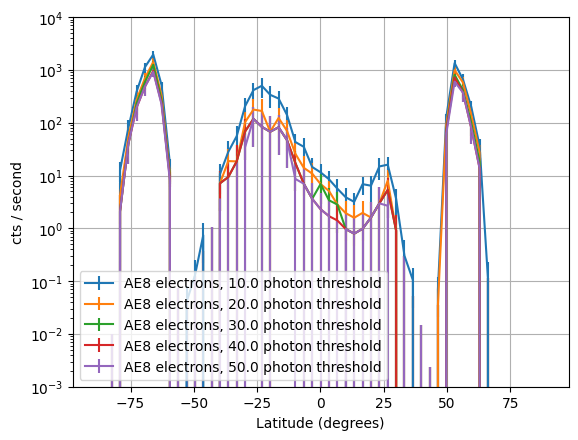

In [184]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, particle_species="e-",label=f"AE8 electrons, {photon_threshold} photon threshold",threshold_photon_value=photon_threshold).plot_run_dict(xvalues_to_use="latitudes")
plt.legend()

plt.ylim([1e-3,1e4])
save_figure_for_paper("Electron_with_threshold")

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].valu

(830.0, 850.0)

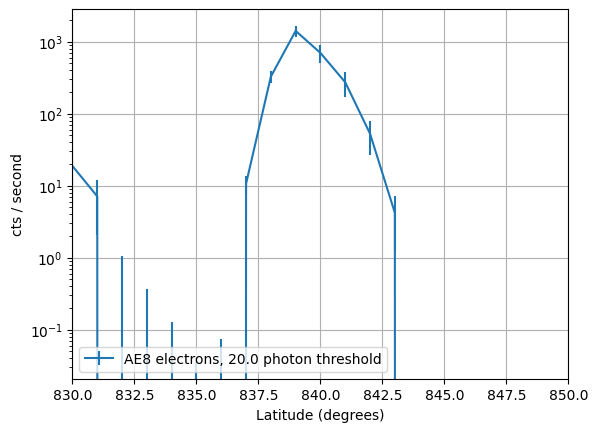

In [185]:
for photon_threshold in [20.0]:
    test_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, particle_species="e-",label=f"AE8 electrons, {photon_threshold} photon threshold",threshold_photon_value=photon_threshold)
    test_orbital_run.plot_run_dict()
plt.legend()
plt.xlim([830,850])

In [186]:
max(test_orbital_run.run_dict_event_counts)

/tmp/ipykernel_94341/2767836452.py:1: FutureWarning: AffineScalarFunc.__gt__() is deprecated. It will be removed in a future release.
  max(test_orbital_run.run_dict_event_counts)
/tmp/ipykernel_94341/2767836452.py:1: FutureWarning: AffineScalarFunc.__lt__() is deprecated. It will be removed in a future release.
  max(test_orbital_run.run_dict_event_counts)


1416.5101322038697+/-242.9294835129918

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)
/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].valu

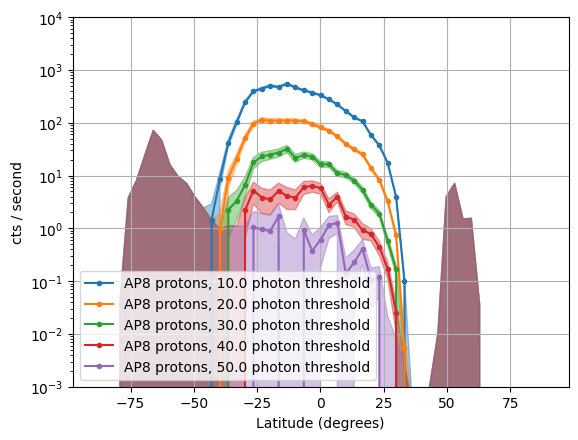

In [187]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    orbital_run(IRENE8_450_protons_differential_single_orbit, particle_species="proton",
                                                number_of_particles_to_simulate=1_000_000,
                                                label=f"AP8 protons, {photon_threshold} photon threshold",
                                                threshold_photon_value=photon_threshold).plot_run_dict(xvalues_to_use="latitudes", 
                                                error_bar_function=fill_between_errorbar)
plt.legend()
plt.ylim([1e-3,1e4])
save_figure_for_paper("Proton_with_threshold")

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


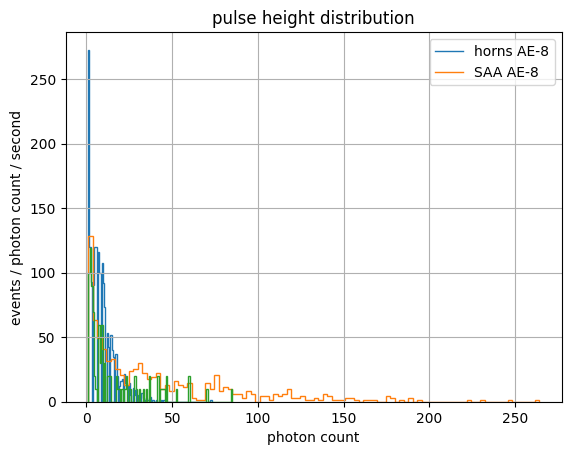

In [188]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()

plt.legend(["horns AE-8","SAA AE-8"])

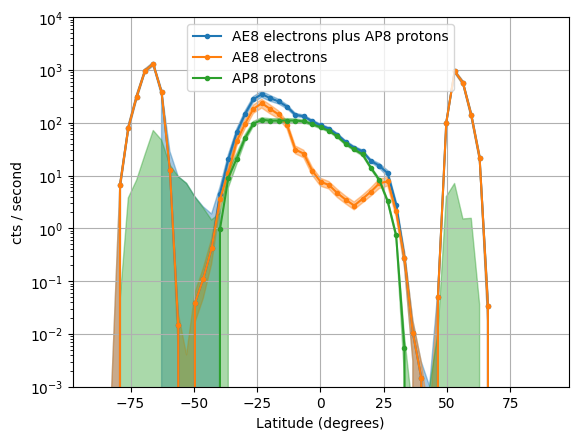

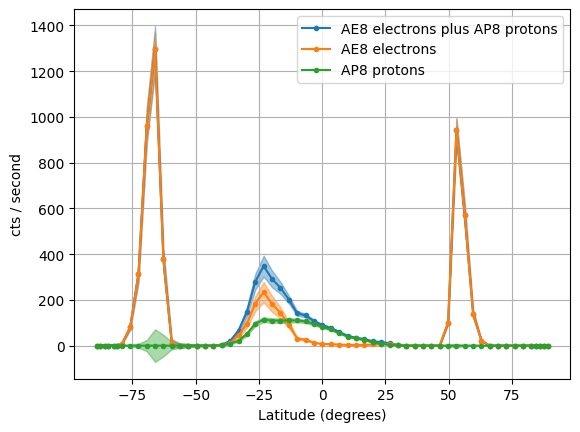

In [189]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
plt.legend()
#plt.legend(["total","electrons","protons"])
save_figure_for_paper("HEPI_background_output")
plt.ylim([1e-3,1e4])

plt.figure()
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
#plt.legend(["total","electrons","protons"])
plt.legend()
plt.yscale("linear")

In [190]:
default_rigidities = np.concatenate([[0,1,2,3,4],np.linspace(5,20,5)])

In [191]:
test_spectrum = pd.read_json("GLE05spectrum_multipliedby1.json")[pd.read_json("GLE05spectrum_multipliedby1.json")["Energy (MeV/n)"] > 400]
test_spectrum

Energy (MeV/n)  d_Flux / d_E (cm-2 s-1 sr-1 (MeV/n)-1)
31        409.720972                            8.011022e-01
32        419.711971                            7.579128e-01
33        429.702970                            7.177968e-01
34        439.693969                            6.804775e-01
35        449.684968                            6.457083e-01
...              ...                                     ...
9995    99960.036004                            1.816334e-16
9996    99970.027003                            1.813307e-16
9997    99980.018002                            1.810284e-16
9998    99990.009001                            1.807267e-16
9999   100000.000000                            1.805760e-16

[9969 rows x 2 columns]

In [192]:
np.trapz(test_spectrum["d_Flux / d_E (cm-2 s-1 sr-1 (MeV/n)-1)"],
            test_spectrum["Energy (MeV/n)"]) * np.pi * 6

/tmp/ipykernel_94341/3972231628.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  np.trapz(test_spectrum["d_Flux / d_E (cm-2 s-1 sr-1 (MeV/n)-1)"],


np.float64(3685.36364904686)

In [193]:
np.trapz(pd.read_json("GLE05spectrum_multipliedby1.json")["d_Flux / d_E (cm-2 s-1 sr-1 (MeV/n)-1)"],
            pd.read_json("GLE05spectrum_multipliedby1.json")["Energy (MeV/n)"]) * np.pi

/tmp/ipykernel_94341/2895319385.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  np.trapz(pd.read_json("GLE05spectrum_multipliedby1.json")["d_Flux / d_E (cm-2 s-1 sr-1 (MeV/n)-1)"],


np.float64(4172.534191510181)

In [194]:
SRT.GLE05_integral_count_rate

4172.53769879182

In [195]:
GLE21_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE21spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE21_integral_count_rate)

GLE05_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE05spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE05_integral_count_rate)

In [196]:
array_of_GCR_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,SRT.get_GCR_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,datetime_to_use=SRT.datetime_for_GCR_solar_max)] for rigidity_cut_off_GV in default_rigidities])

In [197]:
dir(array_of_GCR_rig_cutoff_runs[0][1])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_Cherenkov_tuple',
 'directory_to_run_in',
 'generated_geometry',
 'generated_macro',
 'generation_surface_area_cm2',
 'generation_surface_radius',
 'get_particle_spectrum_and_generate_GRAS_file',
 'get_total_photon_inducing_event_count_per_second',
 'incoming_particles_per_s',
 'initialise_dir_and_copy_geom_and_mac_files',
 'initialise_output_gras_directory',
 'initialise_running_directory_and_macro',
 'outputted_tuple',
 'plot_pulse_height_distribution',
 'run_gras_simulation',
 'setup_input_variables',
 'verbose_output']

In [198]:
array_of_GCR_rig_cutoff_runs[0][1].get_total_photon_inducing_event_count_per_second()

3.2804703956266663+/-0.09754495672407407

In [199]:
array_of_GLE21_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,SRT.get_GLE_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,GLE_spec=GLE21_spectrum)] for rigidity_cut_off_GV in default_rigidities])

In [200]:
array_of_GLE21_rig_cutoff_runs

array([[np.float64(0.0),
       [np.float64(1.0),
       [np.float64(2.0),
       [np.float64(3.0),
       [np.float64(4.0),
       [np.float64(5.0),
       [np.float64(8.75),
       [np.float64(12.5),
       [np.float64(16.25),
       [np.float64(20.0),
      dtype=object)

In [201]:
array_of_GLE05_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,SRT.get_GLE_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,GLE_spec=GLE05_spectrum)] for rigidity_cut_off_GV in default_rigidities])

In [202]:
from AsympDirsCalculator import AsympDirsTools
from scipy.interpolate import interp1d
import datetime as dt

In [203]:
def uncertainty_interp1d(x, y, **kwargs):

    n_interp = interp1d(x,[uy_value.n for uy_value in y], **kwargs)
    std_dev_interp = interp1d(x,[uy_value.std_dev for uy_value in y], **kwargs)

    return lambda x_arg:(ufloat(n_interp(x_arg),std_dev_interp(x_arg)) if np.isscalar(x_arg) else unumpy.uarray(n_interp(x_arg),std_dev_interp(x_arg)))

In [204]:
IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]].head().to_numpy()

array([[ 84.29629 , 156.896069],
       [ 87.57371 , 156.643162],
       [ 89.1489  , 336.407396],
       [ 85.8713  , 336.147949],
       [ 82.59322 , 335.896262]])

In [205]:
class multi_rigidity_run():

    def __init__(self, rigidity_run_class, array_of_rigidities_GV=default_rigidities, input_DF_of_coords=None, label=None, threshold_photon_value=10.0, **kwargs):

        self.label = label

        if input_DF_of_coords is None:
            self.array_of_lats_and_longs = np.linspace([-90,0],[90,0],100)
        else:
            self.array_of_lats_and_longs = input_DF_of_coords[["Latitude_deg","Longitude_deg"]].to_numpy()

        self.array_of_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,
                                                  rigidity_run_class(rigidity_cut_off_GV,**kwargs)] for rigidity_cut_off_GV in array_of_rigidities_GV])

        self.array_of_count_rates = np.transpose([self.array_of_rig_cutoff_runs[:,0],
                                                  SRT.acquire_count_rate(self.array_of_rig_cutoff_runs[:,1],threshold_photon_value=threshold_photon_value)])

        # self.rig_interp = interp1d(self.array_of_count_rates[:,0], 
        #                       np.vectorize(lambda x:x.nominal_value)(self.array_of_count_rates[:,1]),
        #                       fill_value="extrapolate")
        self.rig_interp = uncertainty_interp1d(self.array_of_count_rates[:,0], 
                              (self.array_of_count_rates[:,1]),
                              fill_value="extrapolate")

    def plot_count_rates(self):

        SRT.error_bar_from_array(self.array_of_count_rates)
        plt.xlabel("Cut-off rigidity (GV)")
        plt.ylabel("cts / second")

    def get_count_rates_for_coord_array(self, array_of_lats_and_longs:np.array, datetime_for_rigidities=SRT.datetime_for_GCR_solar_max):

        vcutoffs_to_compare_to = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = array_of_lats_and_longs,
                                 dateAndTime=datetime_for_rigidities,cache=True)
        vcutoffs_to_compare_to = vcutoffs_to_compare_to[
            #np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -81.194370) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 72.753770) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -56.147930) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -69.295260) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 39.842640) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 42.992710) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -3.229399) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 33.233800)]  
        vcutoffs_to_compare_to.iloc[5] = vcutoffs_to_compare_to.iloc[4]

        DF_of_count_rates = vcutoffs_to_compare_to["Reffective"].apply(self.rig_interp).reset_index().rename(columns={"Reffective":"count rate"})

        return DF_of_count_rates

    def plot_count_rates_against_longitude_0(self, datetime_for_rigidities=SRT.datetime_for_GCR_solar_max,plot_error_bars=False,**kwargs):

        DF_of_count_rates = self.get_count_rates_for_coord_array(array_of_lats_and_longs = self.array_of_lats_and_longs, 
                                                            datetime_for_rigidities=datetime_for_rigidities)
        
        series_of_latitudes = DF_of_count_rates["initialLatitude"]
        series_of_count_rates = DF_of_count_rates["count rate"].apply(lambda x:x.n)
        series_of_count_rates_errs = DF_of_count_rates["count rate"].apply(lambda x:x.std_dev)
        
        if plot_error_bars == True:
            plt.errorbar(series_of_latitudes,
                        series_of_count_rates,
                        series_of_count_rates_errs,
                        label=self.label,**kwargs)
        else:
            # plt.plot(series_of_latitudes,
            #             series_of_count_rates,
            #             label=self.label,
            #             marker="o",
            #             ms=3,
            #             **kwargs)
            # plt.fill_between(series_of_latitudes,
            #             series_of_count_rates - series_of_count_rates_errs,
            #             series_of_count_rates + series_of_count_rates_errs,
            #             color=plt.gca().lines[-1].get_color(),
            #             alpha=0.4,
            #             label=self.label)
            
            fill_between_errorbar(series_of_latitudes,
                        series_of_count_rates,
                        series_of_count_rates_errs,
                        label=self.label,**kwargs)

        plt.xlabel("Latitude (degrees)")
        plt.ylabel("cts / second")
        plt.grid(True)

    def get_int_time_array(self,background_multi_rigidity_run=0):

        if background_multi_rigidity_run == 0:
            bkg_array_of_count_rates = np.zeros(np.shape(self.array_of_count_rates))
        elif isinstance(background_multi_rigidity_run,SRT.gras_Cherenkov_runner_from_objects):
            bkg_array_of_count_rates = np.full(np.shape(self.array_of_count_rates),background_multi_rigidity_run.get_total_photon_inducing_event_count_per_second())
        else:
            bkg_array_of_count_rates = background_multi_rigidity_run.array_of_count_rates

        int_time_array = np.array([[self.array_of_count_rates[index,0],
                                    SRT.get_integration_time_for_sigma(3,self.array_of_count_rates[index,1],
                                    bkg_array_of_count_rates[index,1])] for index in range(0,len(self.array_of_count_rates))])

        return int_time_array

    def plot_int_time_array(self,background_multi_rigidity_run=0):

        int_time_array = self.get_int_time_array(background_multi_rigidity_run)

        SRT.error_bar_from_array(int_time_array, label=self.label)

        plt.axhline(60,ls="--")
        plt.xlabel("Cut-off rigidity (GV)")
        plt.ylabel("required integration time\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")

    def get_count_rates_for_int_time_array(self, 
                                           array_of_lats_and_longs:np.array, 
                                           datetime_for_rigidities=SRT.datetime_for_GCR_solar_max, 
                                           background_multi_rigidity_run=0):

        vcutoffs_to_compare_to = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = array_of_lats_and_longs,
                                 dateAndTime=datetime_for_rigidities,cache=True)

        int_time_array = self.get_int_time_array(background_multi_rigidity_run)

        time_array_rig_interp = uncertainty_interp1d(int_time_array[:,0], 
                              (int_time_array[:,1]))

        DF_of_int_times = vcutoffs_to_compare_to["Reffective"].apply(time_array_rig_interp).reset_index().rename(columns={"Reffective":"int time"})

        return DF_of_int_times

    def plot_int_time_array_vs_longitude_0(self,
                                           datetime_for_rigidities=SRT.datetime_for_GCR_solar_max,
                                           background_multi_rigidity_run=0,
                                           plot_error_bars=False,
                                           **kwargs):

        DF_of_int_times = self.get_count_rates_for_int_time_array(array_of_lats_and_longs = self.array_of_lats_and_longs, 
                                                            datetime_for_rigidities=datetime_for_rigidities,
                                                            background_multi_rigidity_run=background_multi_rigidity_run)
        
        series_of_latitudes = DF_of_int_times["initialLatitude"]
        series_of_int_times = DF_of_int_times["int time"].apply(lambda x:x.n)
        series_of_int_times_errs = DF_of_int_times["int time"].apply(lambda x:x.std_dev)

        #DF_of_int_times.plot("initialLatitude","int time",ax=plt.gca())
        if plot_error_bars == True:
            plt.errorbar(series_of_latitudes,
                        series_of_int_times,
                        series_of_int_times_errs,
                        label=self.label,**kwargs)
        else:
            # plt.plot(series_of_latitudes,
            #             series_of_int_times,
            #             label=self.label,
            #             marker="o",
            #             ms=3,
            #             **kwargs)
            # plt.fill_between(series_of_latitudes,
            #             series_of_int_times - series_of_int_times_errs,
            #             series_of_int_times + series_of_int_times_errs,
            #             color=plt.gca().lines[-1].get_color(),
            #             alpha=0.4,
            #             label=self.label)
            
            fill_between_errorbar(series_of_latitudes,
                        series_of_int_times,
                        series_of_int_times_errs,
                        label=self.label,**kwargs)

        plt.axhline(60,ls="--")
        plt.xlabel("Latitude (degrees)")
        plt.ylabel("required integration time (s)\nfor 3 sigma certainty")
        plt.grid()
        plt.ylim([0.1,1000])
        plt.yscale("log")



running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


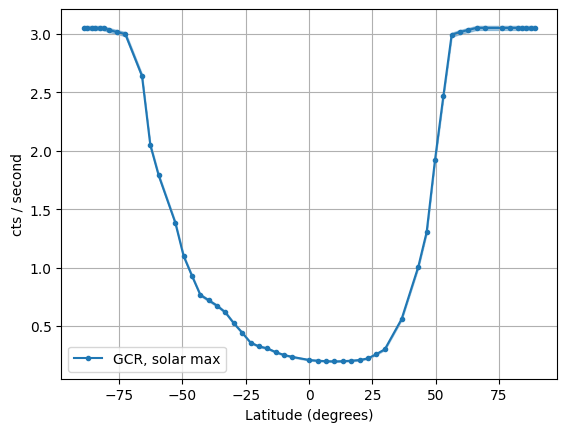

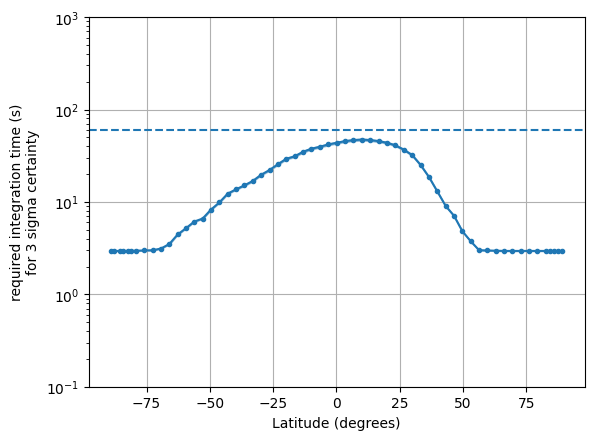

In [206]:
GCR_max_multi_rig_run = multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                                           datetime_to_use=SRT.datetime_for_GCR_solar_max, 
                                           input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                           threshold_photon_value=20.0, 
                                           #number_of_particles=10_001,
                                           number_of_particles=300_001,
                                           label = "GCR, solar max")
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
plt.legend()
plt.figure()
GCR_max_multi_rig_run.plot_int_time_array_vs_longitude_0()

In [207]:
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second()

0.0001933663106844561+/-0.00013673062953800368

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


(0.1, 10000.0)

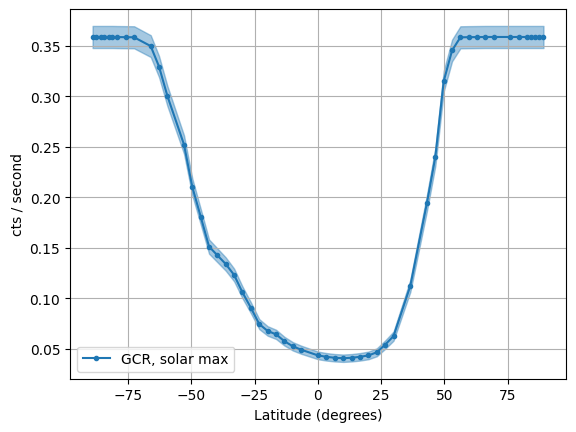

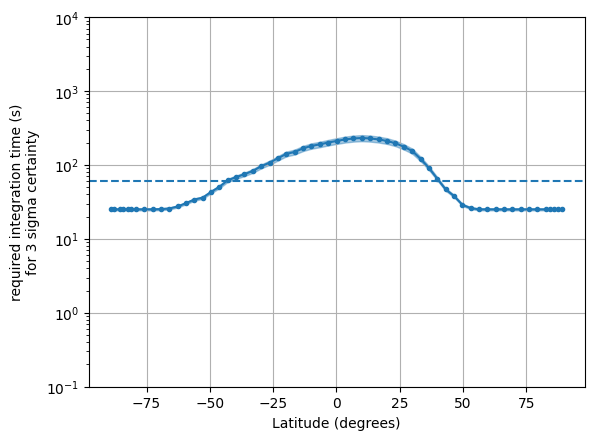

In [208]:
alpha_GCR_max_multi_rig_run = multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                                            datetime_to_use=SRT.datetime_for_GCR_solar_max,
                                            input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], 
                                            threshold_photon_value=20.0,
                                            label = "GCR, solar max",
                                            atomic_number_for_cosmic_rays = 2)
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
plt.legend()
plt.figure()
alpha_GCR_max_multi_rig_run.plot_int_time_array_vs_longitude_0() #marker="o",ms=3,mfc="black",ecolor="black")
plt.ylim([1e-1,1e4])

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


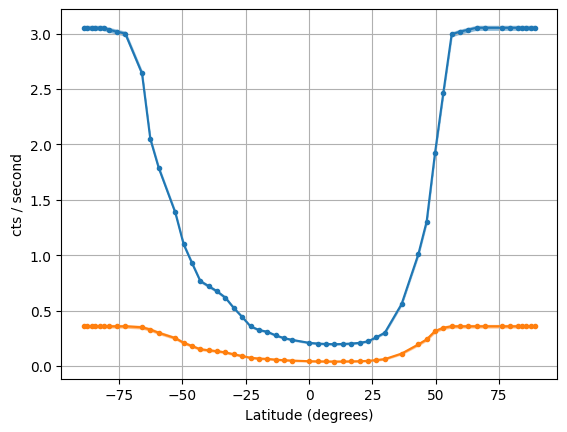

In [209]:
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


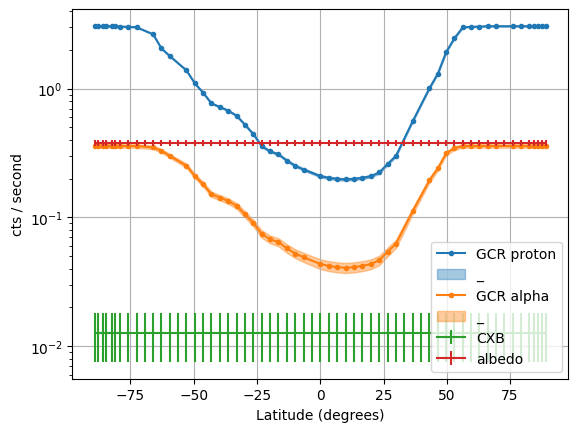

In [210]:
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
CXB_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")
albedo_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes")

plt.legend(["GCR proton","_","GCR alpha","_","CXB","albedo"])

In [211]:
CXB_photons_orbital_run.run_dict[index_for_polar].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second()

0.07852593184336133+/-0.01290958367225811

In [212]:
albedo_photons_orbital_run.run_dict[index_for_polar].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second() / \
    GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second()

0.17147781538141246+/-0.00833958818703282

In [213]:
alpha_GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second() / \
    GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second()

0.11712350023597495+/-0.0034698566942219034

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


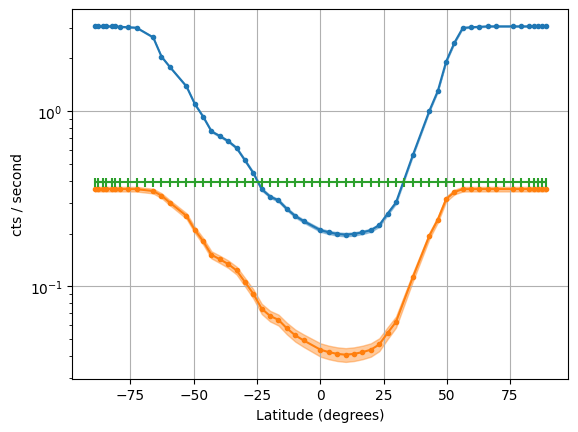

In [214]:
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()

(albedo_photons_orbital_run + CXB_photons_orbital_run).plot_run_dict(xvalues_to_use="latitudes")

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


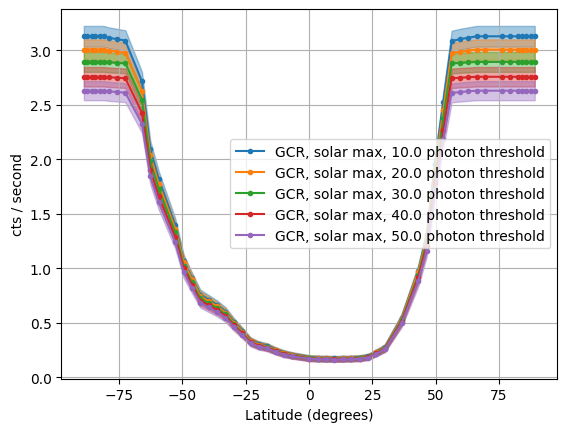

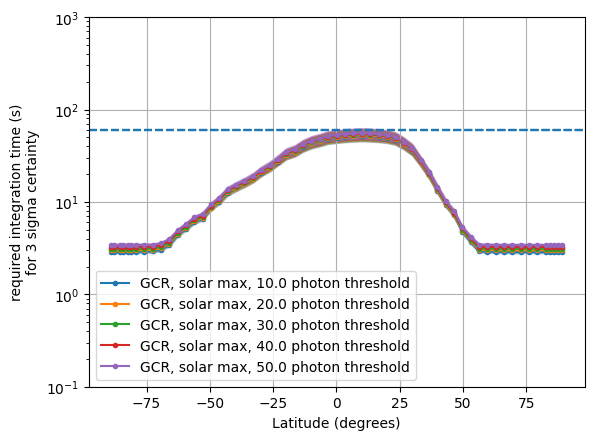

In [215]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,datetime_to_use=SRT.datetime_for_GCR_solar_max, input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], label = f"GCR, solar max, {photon_threshold} photon threshold", threshold_photon_value=photon_threshold).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,datetime_to_use=SRT.datetime_for_GCR_solar_max, input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], label = f"GCR, solar max, {photon_threshold} photon threshold", threshold_photon_value=photon_threshold).plot_int_time_array_vs_longitude_0()
plt.legend()

In [216]:
GLE21_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE21spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE21_integral_count_rate)

GLE05_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE05spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE05_integral_count_rate)

multi_rigidity_GLE21 = multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label="GLE21 protons",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=20.0,
                                          number_of_particles=1_000_000)

multi_rigidity_GLE05 = multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label="GLE05 protons",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=20.0,
                                          number_of_particles=1_000_001)

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


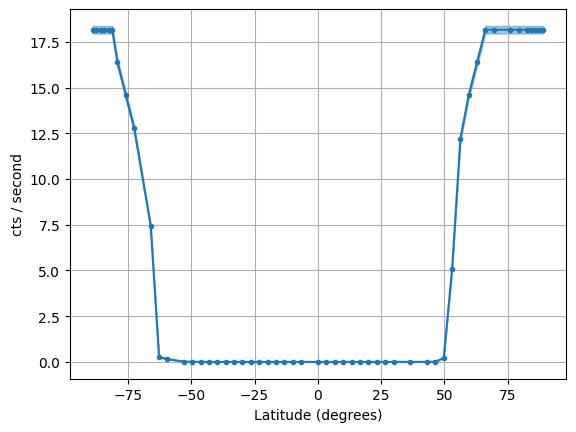

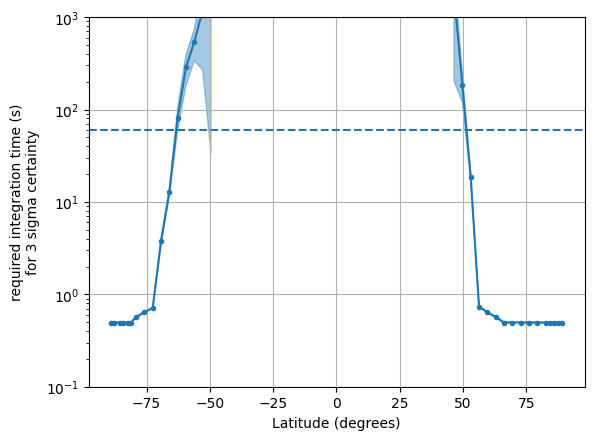

In [217]:
multi_rigidity_GLE21.plot_count_rates_against_longitude_0()
plt.figure()
multi_rigidity_GLE21.plot_int_time_array_vs_longitude_0()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


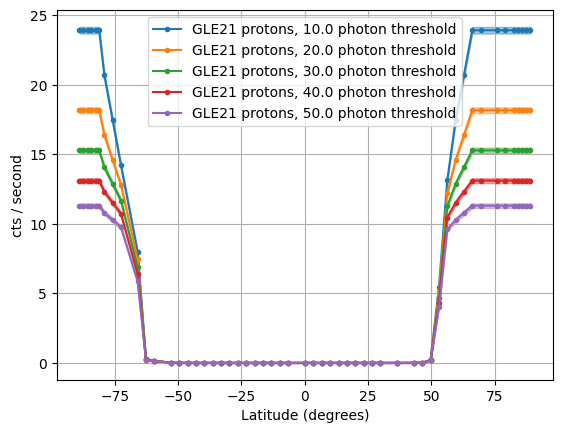

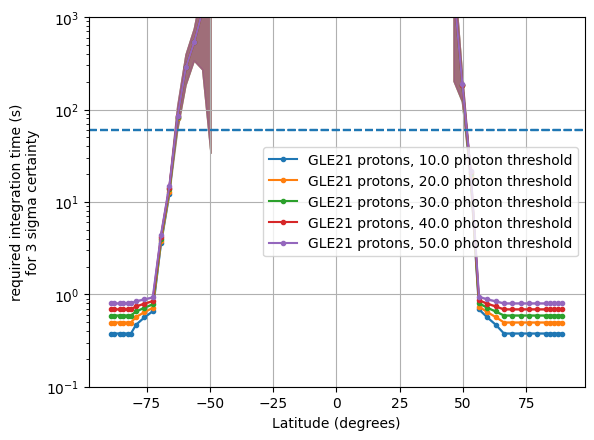

In [218]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label=f"GLE21 protons, {photon_threshold} photon threshold",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label=f"GLE21 protons, {photon_threshold} photon threshold",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_int_time_array_vs_longitude_0()
plt.legend()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


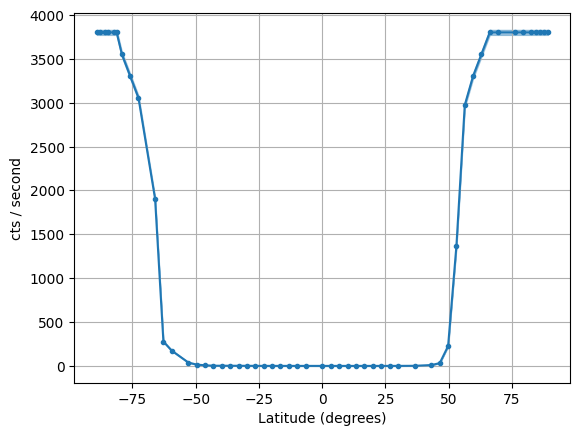

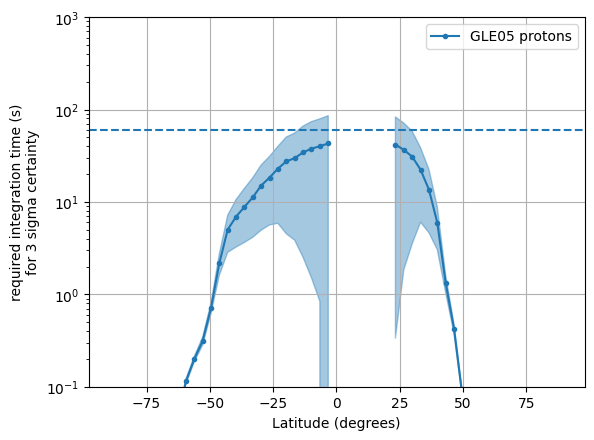

In [219]:
multi_rigidity_GLE05.plot_count_rates_against_longitude_0()
plt.figure()
multi_rigidity_GLE05.plot_int_time_array_vs_longitude_0()
plt.legend()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


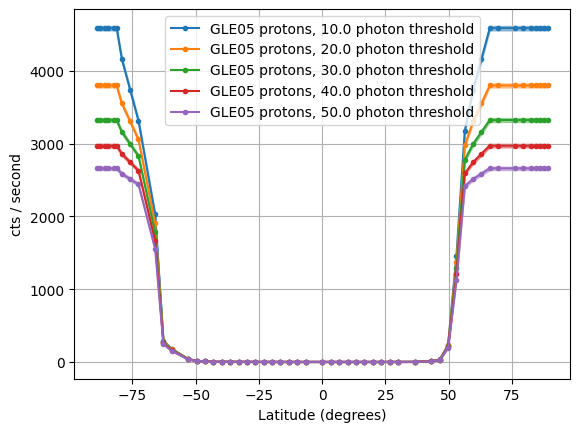

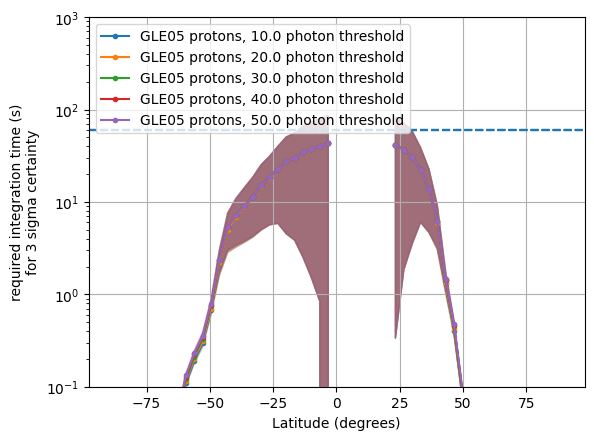

In [220]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label=f"GLE05 protons, {photon_threshold} photon threshold",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          label=f"GLE05 protons, {photon_threshold} photon threshold",
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_int_time_array_vs_longitude_0()
plt.legend()

In [221]:
spacecraft_coords_DF

ModifiedJulianDay  Altitude_km  Latitude_deg  Longitude_deg  \
0          18628.000000     1192.835      0.000000     354.938757   
1          18628.000694     1192.891      3.313331     354.688073   
2          18628.001389     1193.060      6.626412     354.437390   
3          18628.002083     1193.338      9.939000     354.186707   
4          18628.002778     1193.722     13.250860     353.936025   
...                 ...          ...           ...            ...   
1088       18628.755556     1193.970    -13.371240      82.192904   
1089       18628.756250     1193.583    -10.059640      81.942378   
1090       18628.756944     1193.301     -6.747288      81.691850   
1091       18628.757639     1193.129     -3.434439      81.441319   
1092       18628.758333     1193.068     -0.121333      81.190789   

      LocalTime_hrs  PitchAngle_deg  
0         23.662584            90.0  
1         23.662538            90.0  
2         23.662493            90.0  
3         23.662447            90.0  
4         23.662402            90.0  
...             ...             ...  
1088      23.612860            90.0  
1089      23.612825            90.0  
1090      23.612790            90.0  
1091      23.612755            90.0  
1092      23.612719            90.0  

[1093 rows x 6 columns]

In [222]:
def soft_divide(numerator, denominator):

    try:
        return numerator / denominator
    except ZeroDivisionError:
        return ufloat(0.0,0.0)

In [223]:
def calculate_int_time_functional(x_value, signal_flux_func, list_of_background_flux_functions, sigma=3):

    signal_flux = signal_flux_func(x_value)
    signal_flux_modified = np.array([(signal if signal.n != 0.0 else ufloat(np.nan,np.nan)) for signal in signal_flux])

    numerator = (signal_flux_modified + sum([background_flux_func(x_value) for background_flux_func in list_of_background_flux_functions]))

    return (sigma**2) * numerator / (signal_flux_modified**2) 

In [224]:
def plot_world_map():
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    # Creating axes and plotting world map
    fig, ax = plt.subplots(figsize=(12, 6))
    worldmap.plot(color="lightgrey", ax=ax)

In [225]:
def long_east_to_west(longitude_east):

    if longitude_east > 180:
        output_longitude = longitude_east - 360.0
    else:
        output_longitude = longitude_east

    return output_longitude

In [226]:
class full_orbit_background():

    def __init__(self, 
                 DF_of_coordinates:pd.DataFrame, 
                 list_of_multi_rigidity_runs = [],
                 list_of_orbit_background_runs = [],
                 label=None,
                 datetime_for_rigidities = SRT.datetime_for_GCR_solar_max):

        self.DF_of_coordinates = DF_of_coordinates
        self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index
        self.list_of_multi_rigidity_runs = list_of_multi_rigidity_runs
        self.list_of_orbit_background_runs = list_of_orbit_background_runs
        self.label = label

        self.rigidities_for_coordinates = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = DF_of_coordinates[["Latitude_deg","Longitude_deg"]].values,
                                            dateAndTime=datetime_for_rigidities,cache=True)
        self.rigidities_for_coordinates = self.rigidities_for_coordinates[
            #np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -81.194370) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 72.753770) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -56.147930) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -69.295260) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 39.842640) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 42.992710) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -3.229399) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 33.233800)]  
        self.rigidities_for_coordinates.iloc[5] = self.rigidities_for_coordinates.iloc[4]

        self.rig_interp_list = []
        for multi_rigidity_run in list_of_multi_rigidity_runs:
            count_rate_DF = pd.DataFrame(self.rigidities_for_coordinates["Reffective"].copy())
            count_rate_DF["count_rate"] = multi_rigidity_run.rig_interp(count_rate_DF["Reffective"])

            list_of_sub_coordinates = []
            for index, row in count_rate_DF.reset_index().iterrows():
                relevant_coord = self.DF_of_coordinates[self.DF_of_coordinates["Latitude_deg"] == row["initialLatitude"]]
                list_of_sub_coordinates.append(relevant_coord)
            DF_of_sub_coordinates = pd.concat(list_of_sub_coordinates).reset_index()
            count_rate_DF = pd.concat([count_rate_DF.reset_index(),DF_of_sub_coordinates],axis=1).sort_values(by="index")
            count_rate_DF.label = multi_rigidity_run.label

            self.rig_interp_list.append(count_rate_DF)


        self.dict_of_interp_functions = {}
        dict_index = 0
        for interped_rig in self.rig_interp_list:
            self.dict_of_interp_functions[dict_index] = uncertainty_interp1d(x=interped_rig["index"],y=interped_rig["count_rate"])
            self.dict_of_interp_functions[dict_index].label = interped_rig.label
            dict_index += 1

        for orbit_background_run in self.list_of_orbit_background_runs:
            self.dict_of_interp_functions[dict_index] = uncertainty_interp1d(x=orbit_background_run.run_dict_event_counts.index,
                                                            y=orbit_background_run.run_dict_event_counts.values)
            self.dict_of_interp_functions[dict_index].label = orbit_background_run.label
            dict_index += 1

    def plot_cosmic_particles(self, xcol_to_plot_against="orbital_step", indicies=":", error_bar_function=plt.errorbar):

        if indicies == ":":
            rig_interp_list = self.rig_interp_list
        else:
            rig_interp_list = [self.rig_interp_list[indicies]]
        
        for interped_rig in rig_interp_list:
            #interped_rig.plot("index","count_rate",ax=plt.gca())
            error_bar_function(interped_rig[xcol_to_plot_against],
                     interped_rig["count_rate"].apply(lambda x:x.n),
                     interped_rig["count_rate"].apply(lambda x:x.std_dev),
                     label=interped_rig.label)

        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_count_rates(self, xcol_to_plot_against="orbital_step",error_bar_function=plt.errorbar):

        self.plot_cosmic_particles(xcol_to_plot_against,error_bar_function=error_bar_function)

        for orbit_background_run in self.list_of_orbit_background_runs:
            orbit_background_run.plot_run_dict(xvalues_to_use = self.DF_of_coordinates[xcol_to_plot_against],error_bar_function=error_bar_function)

        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_cosmic_vs_trapped(self, xcol_to_plot_against="orbital_step",error_bar_function=plt.errorbar):

        self.plot_cosmic_particles(xcol_to_plot_against,error_bar_function=error_bar_function)

        first_sum = True
        for orbit_background_run in self.list_of_orbit_background_runs:
            if first_sum is True:
                total_background_run = orbit_background_run
                first_sum=False
            else:
                total_background_run = total_background_run + orbit_background_run
                
        total_background_run.plot_run_dict(xvalues_to_use = self.DF_of_coordinates[xcol_to_plot_against],error_bar_function=error_bar_function)

        if xcol_to_plot_against is "Latitude_deg":
            plt.xlabel("Latitude (degrees)")
        else:
            plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_int_time(self, signal_index=0, xcol_to_plot_against="orbital_step"):

        signal_interp_function = self.dict_of_interp_functions[signal_index]
        keys_array = np.array(list(self.dict_of_interp_functions.keys()))
        background_indicies = keys_array[keys_array != signal_index]
        background_interp_function_list = [self.dict_of_interp_functions[index] for index in background_indicies]

        # signal_values = signal_interp_function(self.DF_of_coordinates.index)
        # background_values = background_interp_function(self.DF_of_coordinates.index)

        output_int_time_values = calculate_int_time_functional(self.DF_of_coordinates.index, 
                                                               signal_interp_function, 
                                                               background_interp_function_list,
                                                               sigma=3)

        xvals_to_plot_against = self.DF_of_coordinates[xcol_to_plot_against]

        #plt.plot(self.DF_of_coordinates.index, output_int_time_values)
        # plt.errorbar(xvals_to_plot_against, #self.DF_of_coordinates.index,
        #              [time_value.n for time_value in output_int_time_values],
        #              [time_value.std_dev for time_value in output_int_time_values])
        
        fill_between_errorbar(xvals_to_plot_against, #self.DF_of_coordinates.index,
                     [time_value.n for time_value in output_int_time_values],
                     [time_value.std_dev for time_value in output_int_time_values],
                     label=signal_interp_function.label)

        plt.axhline(60,ls="--")
        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("required integration time (s)\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")
        plt.grid(True)
        plt.legend()

        #return output_int_time_values

    def plot_spacecraft_trajectory(self):

        plot_world_map()

        self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)

        sns.scatterplot(data=self.DF_of_coordinates,x="Longitude_east_deg",y="Latitude_deg")

    def get_count_rate_info(self, signal_index=0):

        print(f"polar count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_polar]['count_rate'].iloc[0]}".replace("+/-","±"))
        print(f"horns count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_horns_max]['count_rate'].iloc[0]}".replace("+/-","±"))
        print(f"SAA count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_SAA_max]['count_rate'].iloc[0]}".replace("+/-","±"))

    
    def get_int_time_info(self, signal_index=0, account_for_background=True):

        signal_interp_function = self.dict_of_interp_functions[signal_index]
        keys_array = np.array(list(self.dict_of_interp_functions.keys()))
        background_indicies = keys_array[keys_array != signal_index]
        if account_for_background==True:
            background_interp_function_list = [self.dict_of_interp_functions[index] for index in background_indicies]
        else:
            background_interp_function_list = [lambda x:0]

        # signal_values = signal_interp_function(self.DF_of_coordinates.index)
        # background_values = background_interp_function(self.DF_of_coordinates.index)

        output_int_time_values = calculate_int_time_functional(self.DF_of_coordinates.index, 
                                                               signal_interp_function, 
                                                               background_interp_function_list,
                                                               sigma=3)

        xvals_to_plot_against = self.DF_of_coordinates["orbital_step"]

        print(f"polar int time is: {output_int_time_values[xvals_to_plot_against == index_for_polar][0]}".replace("+/-","±"))
        print(f"horns int time is: {output_int_time_values[xvals_to_plot_against == index_for_horns_max][0]}".replace("+/-","±"))
        print(f"SAA int time is: {output_int_time_values[xvals_to_plot_against == index_for_SAA_max][0]}".replace("+/-","±"))

<>:101: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
<>:101: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
/tmp/ipykernel_94341/1913410967.py:101: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if xcol_to_plot_against is "Latitude_deg":


In [227]:
default_trajectory_DF = spacecraft_coords_DF.iloc[790:850]
default_trajectory_DF["Minutes"] = (default_trajectory_DF["ModifiedJulianDay"] - default_trajectory_DF["ModifiedJulianDay"].iloc[0]) * (24 * 60)

/tmp/ipykernel_94341/3269862290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_trajectory_DF["Minutes"] = (default_trajectory_DF["ModifiedJulianDay"] - default_trajectory_DF["ModifiedJulianDay"].iloc[0]) * (24 * 60)


/tmp/ipykernel_94341/1913410967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


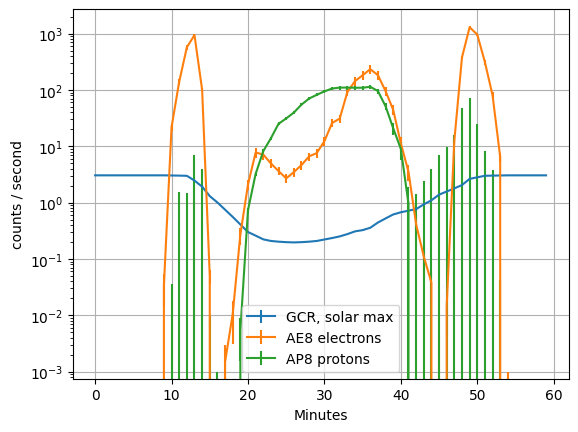

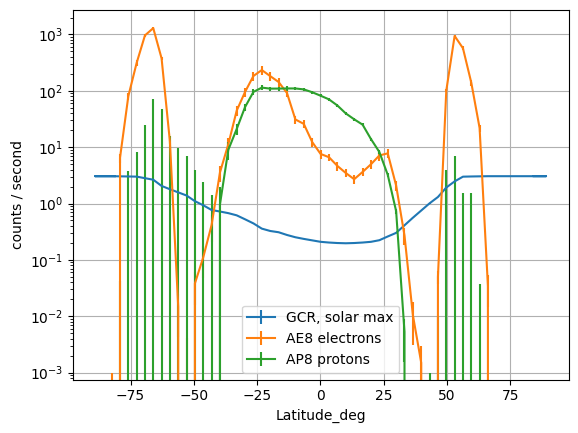

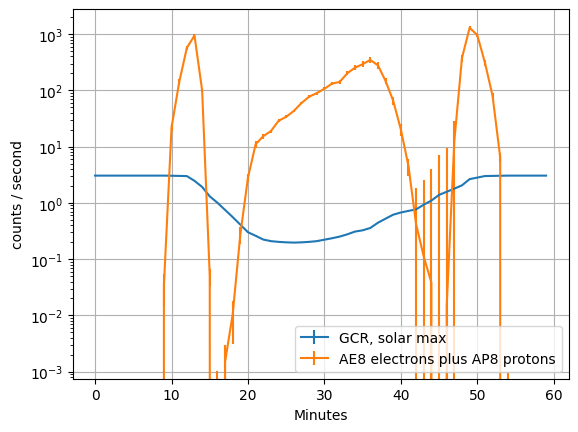

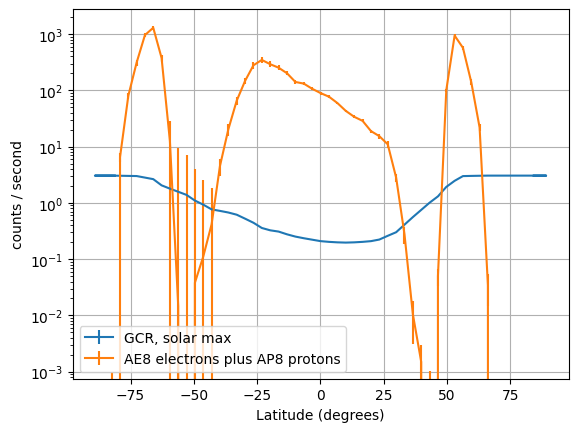

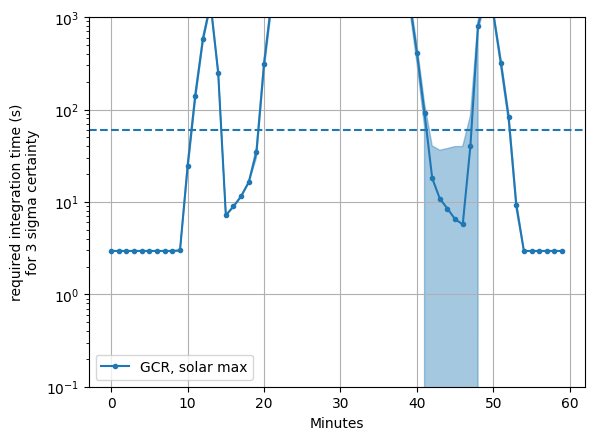

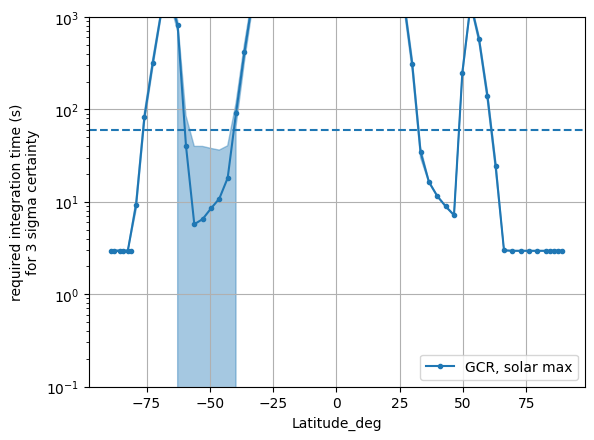

In [228]:
GCR_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])
#GCR_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GCR_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_count_rates(xcol_to_plot_against="Latitude_deg")
plt.figure()
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")
plt.figure()
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Latitude_deg")


In [229]:
GCR_orbit_background.rigidities_for_coordinates.iloc[5]

Rlower        0.0
Reffective    0.0
Rupper        0.0
Name: (-81.19437, 142.104739), dtype: float64

In [230]:
GCR_orbit_background.rigidities_for_coordinates.reset_index().index

RangeIndex(start=0, stop=54, step=1)

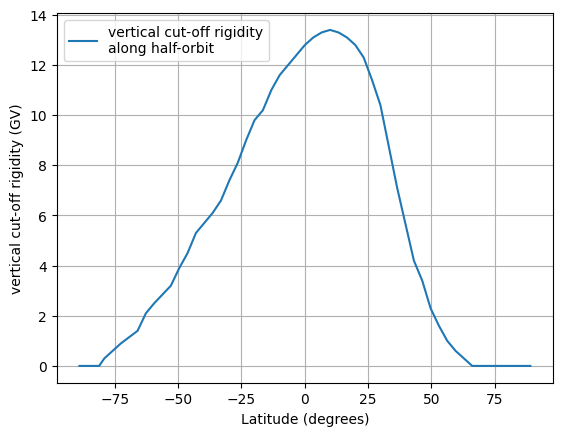

In [231]:
plt.plot(GCR_orbit_background.rigidities_for_coordinates.reset_index()["initialLatitude"], #.index,
         GCR_orbit_background.rigidities_for_coordinates["Reffective"], label="vertical cut-off rigidity\nalong half-orbit")
plt.grid(True)
plt.ylabel("vertical cut-off rigidity (GV)")
plt.xlabel("Latitude (degrees)")
plt.legend()

/tmp/ipykernel_94341/1913410967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index
/tmp/ipykernel_94341/921604826.py:8: RuntimeWarning: invalid value encountered in power
  return (sigma**2) * numerator / (signal_flux_modified**2)


running MAGNETOCOSMICS to acquire asymptotic directions...


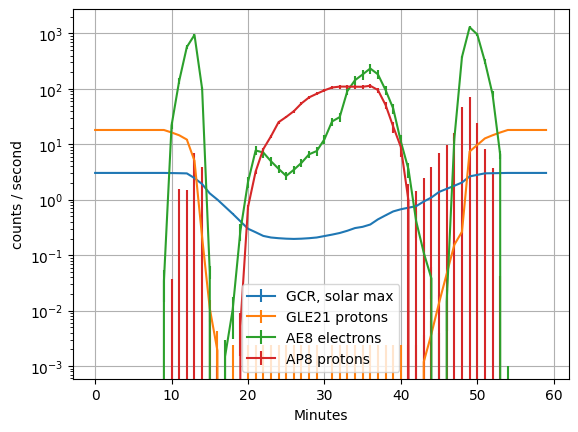

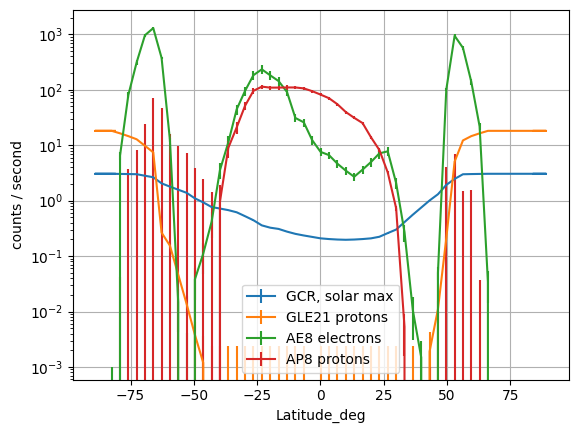

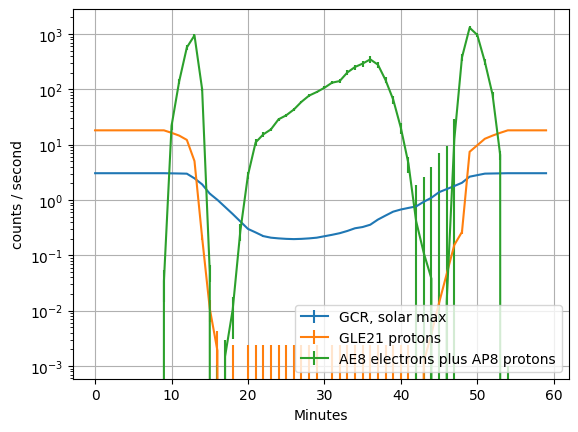

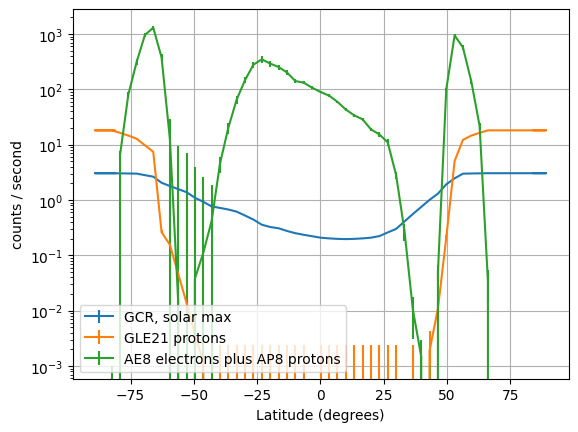

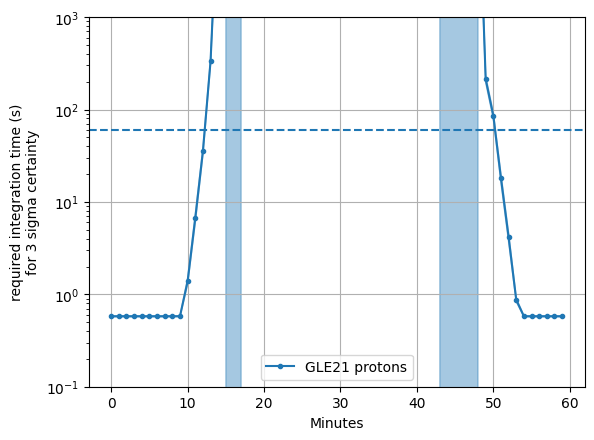

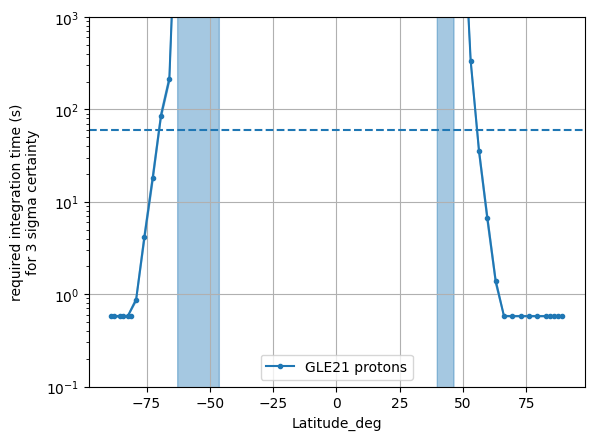

In [232]:
GLE21_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run,multi_rigidity_GLE21],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])
#GLE21_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GLE21_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_count_rates(xcol_to_plot_against="Latitude_deg")
plt.figure()
GLE21_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")
plt.figure()
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

/tmp/ipykernel_94341/1913410967.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


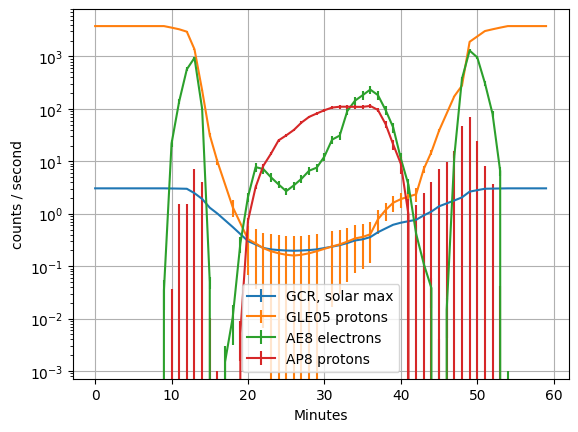

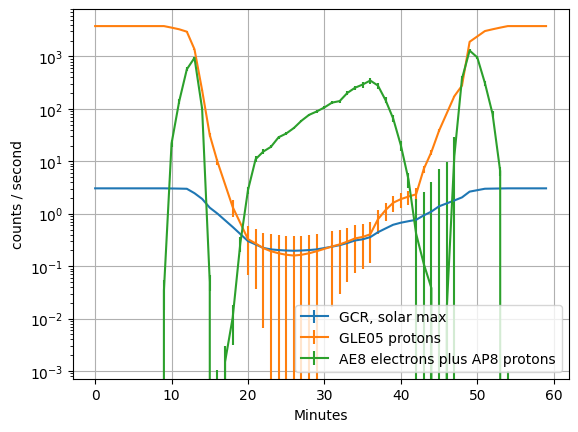

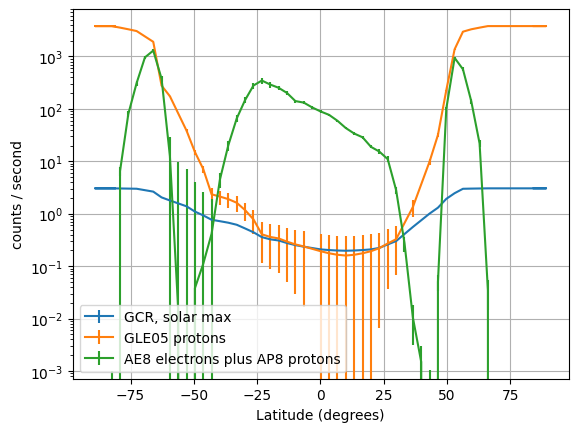

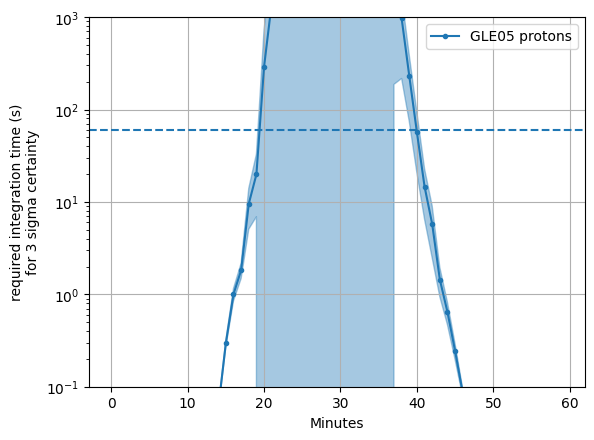

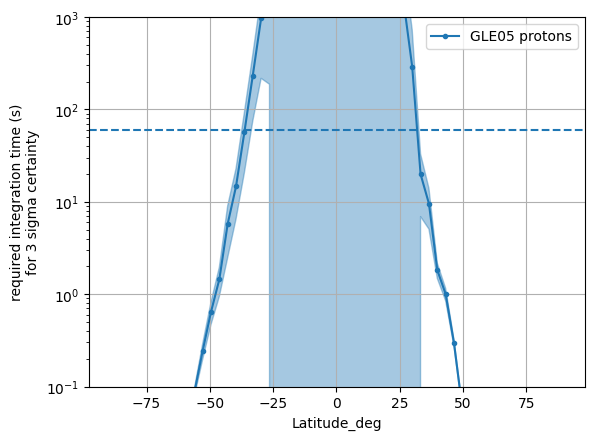

In [233]:
GLE05_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run,multi_rigidity_GLE05],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])

#GLE05_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GLE05_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")
plt.figure()
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

In [234]:
dir(GLE21_orbit_background)

['DF_of_coordinates',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'dict_of_interp_functions',
 'get_count_rate_info',
 'get_int_time_info',
 'label',
 'list_of_multi_rigidity_runs',
 'list_of_orbit_background_runs',
 'plot_cosmic_particles',
 'plot_cosmic_vs_trapped',
 'plot_count_rates',
 'plot_int_time',
 'plot_spacecraft_trajectory',
 'rig_interp_list',
 'rigidities_for_coordinates']

(1e-05, 100000.0)

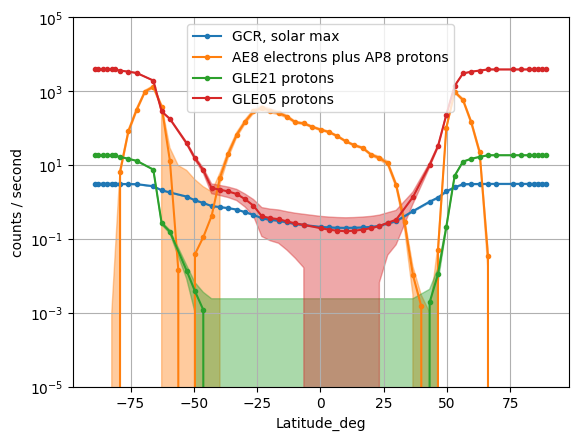

In [235]:
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg", error_bar_function=fill_between_errorbar)
GLE21_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)
GLE05_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)

plt.ylim([1e-5,1e5])

In [292]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

running MAGNETOCOSMICS to acquire asymptotic directions...


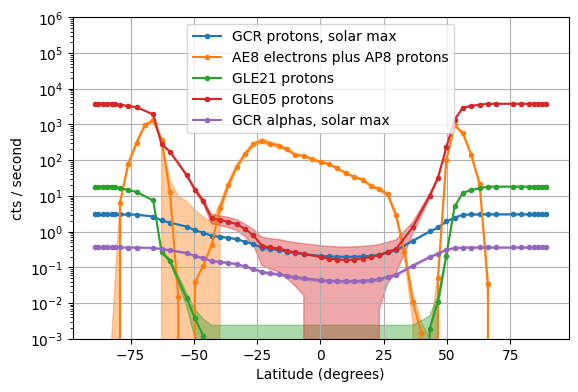

In [307]:
plt.rcParams['figure.constrained_layout.use'] = False  # <-- critical
plt.rcParams['figure.autolayout'] = False

plt.style.use('default')               # Reset to 2023 default style
fig, ax = plt.subplots(constrained_layout=False)  # Turn off modern spacing
#fig.set_size_inches(6.4, 4.8/1.1)          # Use classic default figure size
fig.set_size_inches(6.4, 4.8/1.15)          # Use classic default figure size
ax.set_position([0.125, 0.11, 0.775, 0.77])  # Classic axes position box

GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg", error_bar_function=fill_between_errorbar)
GLE21_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)
GLE05_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)

alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
#albedo_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
#CXB_photons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)


plt.legend(["GCR protons, solar max", "_nolegend_",
            "AE8 electrons plus AP8 protons", "_nolegend_",
            "GLE21 protons", "_nolegend_",
            "GLE05 protons", "_nolegend_",
            "GCR alphas, solar max"])

# handles, labels = plt.gca().get_legend_handles_labels()
# filtered_labels = [label for label in labels if label != "_nolegend_"]  
# filtered_handles = [handle for handle in handles if handle != "_nolegend_"]
# by_label = dict(zip(filtered_labels, filtered_handles))
# plt.legend(by_label.values(), by_label.keys())

handles, labels = plt.gca().get_legend_handles_labels()
# handles_labels_filtered = [(h, l) for h, l in zip(handles, labels) if l != "_nolegend_"]
# if handles_labels_filtered:
#     handles, labels = zip(*handles_labels_filtered)
#     labels[0] = "GCR protons, solar max"
#     plt.legend(handles, labels)
labels[0] = "GCR protons, solar max"
labels[1] = "AE8 electrons plus AP8 protons"
labels[2] = "GLE21 protons"
labels[3] = "GLE05 protons"
labels[4] = "GCR alphas, solar max"
plt.legend(handles, labels)

plt.ylim([1e-3,1e6])

plt.xlabel("Latitude (degrees)")

# plt.gcf().set_size_inches(6.4, 4.8)
# plt.gca().set_position([0.125, 0.11, 0.775, 0.77])

save_figure_for_paper("GLEs_output")

In [237]:
labels

['GCR protons, solar max',
 'AE8 electrons plus AP8 protons',
 'GLE21 protons',
 'GLE05 protons',
 'GCR alphas, solar max']

In [238]:
handles

In [239]:
labels

['GCR protons, solar max',
 'AE8 electrons plus AP8 protons',
 'GLE21 protons',
 'GLE05 protons',
 'GCR alphas, solar max']

/tmp/ipykernel_94341/921604826.py:8: RuntimeWarning: invalid value encountered in power
  return (sigma**2) * numerator / (signal_flux_modified**2)


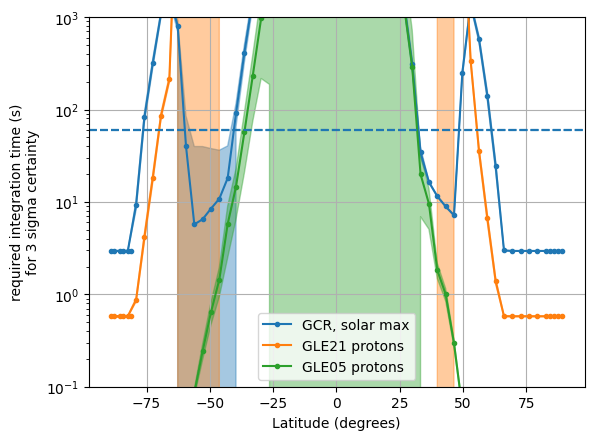

In [240]:
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Latitude_deg")
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

plt.xlabel("Latitude (degrees)")

save_figure_for_paper("GLEs_req_int_time")

background count rates and int time

In [241]:
GCR_orbit_background.get_count_rate_info(signal_index=0)

polar count rate is: 3.053±0.017
horns count rate is: 2.643±0.016
SAA count rate is: 0.358±0.006


In [242]:
GLE21_orbit_background.get_count_rate_info(signal_index=1)

polar count rate is: 18.17±0.21
horns count rate is: 7.44±0.11
SAA count rate is: 0.0000±0.0024


In [243]:
GLE05_orbit_background.get_count_rate_info(signal_index=1)

polar count rate is: 3802±28
horns count rate is: 1906±18
SAA count rate is: 0.41±0.29


In [244]:
GLE05_orbit_background.rig_interp_list[1][GLE05_orbit_background.rig_interp_list[1]['index'] == index_for_polar]['count_rate'].iloc[0]

3802.2751327986175+/-28.23947475701886

/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


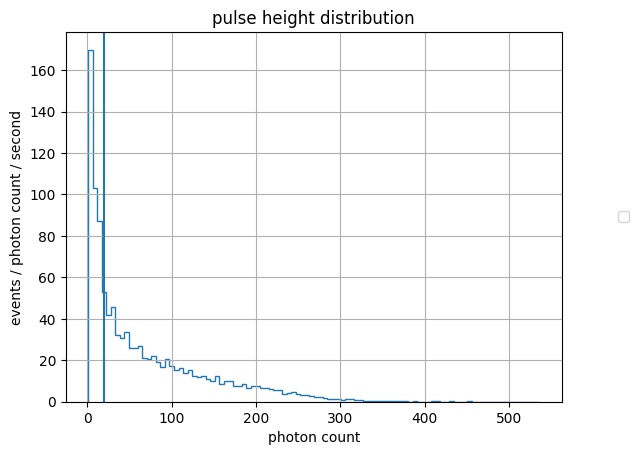

In [245]:
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].plot_pulse_height_distribution()
plt.axvline(20)

In [246]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0)

3.052673946775508+/-0.017179701668110215

In [247]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.pulse_height_values

Si_detection_probability
event_id                          
67328                           10
140572                           8

In [248]:
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.pulse_height_values

Si_detection_probability
event_id                          
4927                             5
19896                           10
21972                           15
29564                            7
43442                            6
...                            ...
976809                           3
976360                           3
975910                           7
993126                           5
989975                          11

[126 rows x 1 columns]

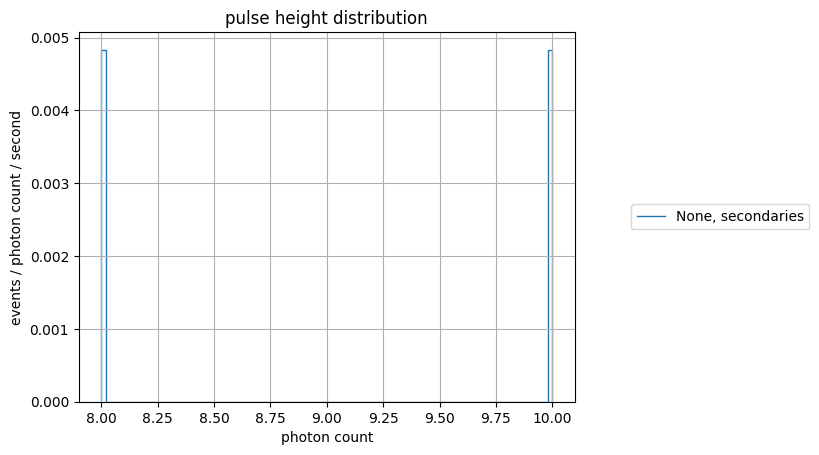

In [249]:
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()

In [250]:
#GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 8.0)

In [251]:
#GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0)

In [252]:
# print(100 * GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
# GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

# print(100 * GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
# GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

# print(100 * GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
# GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))


/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


(0.0001, 10000.0)

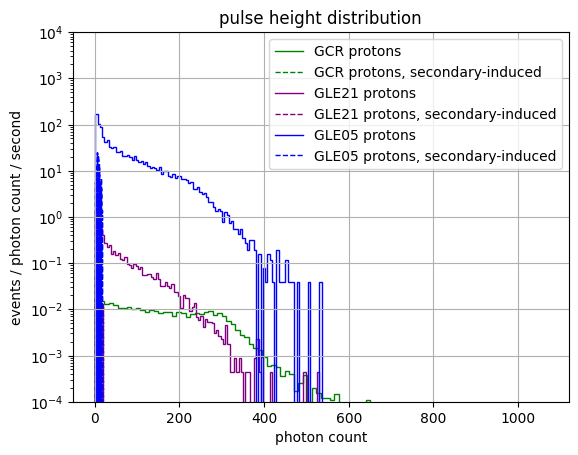

In [253]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="green")
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="green",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="purple")
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="purple",ls="--")

GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="blue")
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

plt.yscale("log")

plt.legend([
    "GCR protons",
    "GCR protons, secondary-induced",
    "GLE21 protons",
    "GLE21 protons, secondary-induced",
    "GLE05 protons",
    "GLE05 protons, secondary-induced",
])

plt.ylim([1e-4,1e4])

In [254]:
SAA_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max], 
                                             particle_species="proton",
                                             number_of_particles_to_simulate=10_000_000,label="AP8 protons",threshold_photon_value=20.0)

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)


In [255]:
SAA_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max], 
                                            particle_species="e-",
                                            label="AE8 electrons",
                                            threshold_photon_value=20.0, 
                                            number_of_particles_to_simulate=10_000_001)

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)


In [256]:
horns_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_horns_max], 
                                            particle_species="e-",
                                            label="AE8 electrons",
                                            threshold_photon_value=20.0, 
                                            number_of_particles_to_simulate=1_000_000)

/tmp/ipykernel_94341/2334373132.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)


/home/xisacross/programming/HEPI/WP4100_simulations/testing_modifications/running_from_Python/Cherenkov_run_tuple.py:198: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))


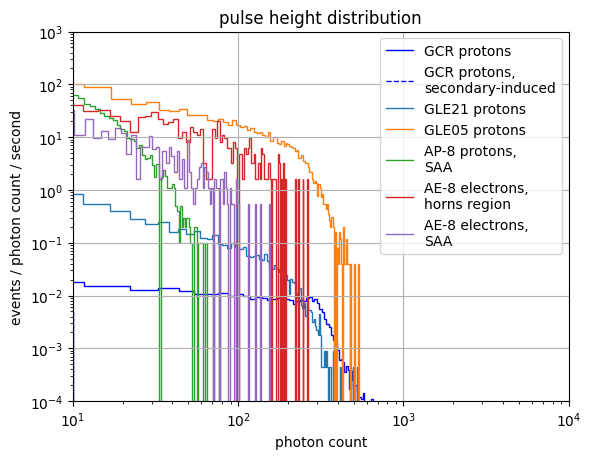

In [271]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution(color="blue")
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution()
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.plot_pulse_height_distribution()
#GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="orange",ls="--")

SAA_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()
horns_IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].plot_pulse_height_distribution()
SAA_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()

plt.xlim([1e1,1e4])
plt.ylim([1e-4,1e3])
plt.yscale("log")
plt.xscale("log")

plt.legend([
    "GCR protons",
    "GCR protons,\nsecondary-induced",
    "GLE21 protons",
    "GLE05 protons",
    "AP-8 protons,\nSAA",
    "AE-8 electrons,\nhorns region",
    "AE-8 electrons,\nSAA",
])


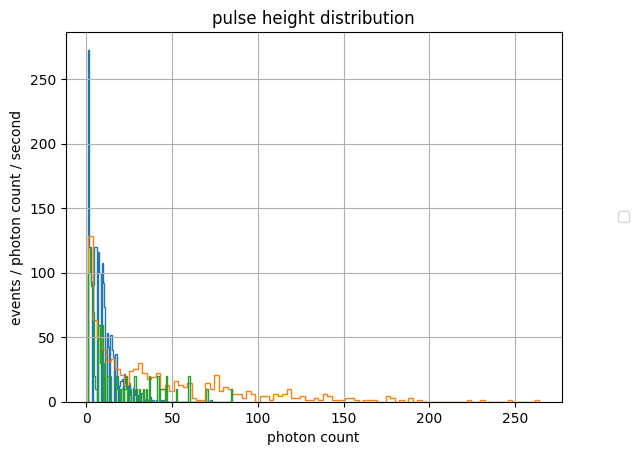

In [258]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].plot_pulse_height_distribution()

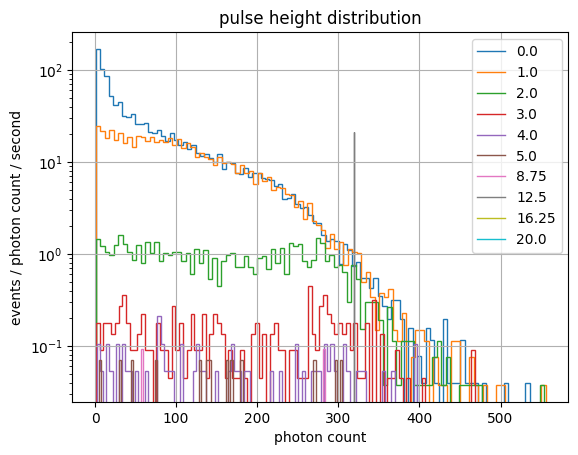

In [259]:
for rig_cut_off, rig_cut_off_run in GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs:
    rig_cut_off_run.plot_pulse_height_distribution()
#plt.axvline(20)
plt.yscale("log")
#plt.xscale("log")
plt.legend(GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[:,0])

In [260]:
GCR_orbit_background.get_int_time_info(signal_index=0)

polar int time is: 2.948±0.017
horns int time is: (1.67±0.13)e+03
SAA int time is: (2.44±0.33)e+04


In [261]:
GLE21_orbit_background.get_int_time_info(signal_index=1)

polar int time is: 0.579±0.008
horns int time is: 212±18
SAA int time is: nan±nan


/tmp/ipykernel_94341/921604826.py:8: RuntimeWarning: invalid value encountered in power
  return (sigma**2) * numerator / (signal_flux_modified**2)


In [262]:
GLE05_orbit_background.get_int_time_info(signal_index=1)

polar int time is: 0.002369±0.000018
horns int time is: 0.00794±0.00028
SAA int time is: (1.9±2.7)e+04


In [263]:
GCR_orbit_background.get_int_time_info(signal_index=0,account_for_background=False)

polar int time is: 2.948±0.017
horns int time is: 3.406±0.021
SAA int time is: 25.1±0.4


In [264]:
GLE21_orbit_background.get_int_time_info(signal_index=1,account_for_background=False)

polar int time is: 0.495±0.006
horns int time is: 1.210±0.018
SAA int time is: nan±nan


/tmp/ipykernel_94341/921604826.py:8: RuntimeWarning: invalid value encountered in power
  return (sigma**2) * numerator / (signal_flux_modified**2)


In [265]:
GLE05_orbit_background.get_int_time_info(signal_index=1,account_for_background=False)

polar int time is: 0.002367±0.000018
horns int time is: 0.00472±0.00005
SAA int time is: 22±16


In [266]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: (1.30±0.10)e+03 cts/s
SAA region count rate: (3.5±0.5)e+02 cts/s
